In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.precision', 2) 

In [36]:
#read of dataphram and overview of data
warnings.filterwarnings("ignore")
df = pd.read_csv('../data/raw/diabetes_dataset.csv')
def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        overview: Überblick über einige Eigenschaften der Spalten eines DataFrames.
    '''
    overview=display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing values(n)': df.isna().sum(),
                          'missing values(%)': df.isna().mean()*100,
                          'number of uniques': df.nunique(),
                          'uniques': [df[col].unique() for col in df.columns]
                         }))
    return overview
    
overview(df)

dtype   total  missing values(n)  \
age                                   int64  100000                  0   
gender                               object  100000                  0   
ethnicity                            object  100000                  0   
education_level                      object  100000                  0   
income_level                         object  100000                  0   
employment_status                    object  100000                  0   
smoking_status                       object  100000                  0   
alcohol_consumption_per_week          int64  100000                  0   
physical_activity_minutes_per_week    int64  100000                  0   
diet_score                          float64  100000                  0   
sleep_hours_per_day                 float64  100000                  0   
screen_time_hours_per_day           float64  100000                  0   
family_history_diabetes               int64  100000                  0   
hypertension_history                  int64  100000                  0   
cardiovascular_history                int64  100000                  0   
bmi                                 float64  100000                  0   
waist_to_hip_ratio                  float64  100000                  0   
systolic_bp                           int64  100000                  0   
diastolic_bp                          int64  100000                  0   
heart_rate                            int64  100000                  0   
cholesterol_total                     int64  100000                  0   
hdl_cholesterol                       int64  100000                  0   
ldl_cholesterol                       int64  100000                  0   
triglycerides                         int64  100000                  0   
glucose_fasting                       int64  100000                  0   
glucose_postprandial                  int64  100000                  0   
insulin_level                       float64  100000                  0   
hba1c                               float64  100000                  0   
diabetes_risk_score                 float64  100000                  0   
diabetes_stage                       object  100000                  0   
diagnosed_diabetes                    int64  100000                  0   

                                    missing values(%)  number of uniques  \
age                                               0.0                 73   
gender                                            0.0                  3   
ethnicity                                         0.0                  5   
education_level                                   0.0                  4   
income_level                                      0.0                  5   
employment_status                                 0.0                  4   
smoking_status                                    0.0                  3   
alcohol_consumption_per_week                      0.0                 11   
physical_activity_minutes_per_week                0.0                620   
diet_score                                        0.0                101   
sleep_hours_per_day                               0.0                 71   
screen_time_hours_per_day                         0.0                156   
family_history_diabetes                           0.0                  2   
hypertension_history                              0.0                  2   
cardiovascular_history                            0.0                  2   
bmi                                               0.0                240   
waist_to_hip_ratio                                0.0                 40   
systolic_bp                                       0.0                 86   
diastolic_bp                                      0.0                 60   
heart_rate                                        0.0                 64   
cholesterol_total                                 0.0                210 

In [37]:
def logistic_prediction(df: pd.DataFrame, feature: str, target: str) -> pd.Series:

    """
    return datafram series for the predicted target
    
    Parameters:
    -----------
    df : Datafram 
    feature : str (column name for independent Variable)
    target : str (column name for target variable(0/1))
    """

    model = smf.logit(formula=f'{target} ~ {feature}', data=df)
    results = model.fit(disp=False)

    value_range = np.linspace(df[feature].min(), df[feature].max(), 300)
    value_range_df = pd.DataFrame(value_range)
    value_range_df.columns=[feature]

    predicted_target = results.predict(value_range_df)
    return value_range, predicted_target

Visualization

Number of people in each class in diabetes_stage column in percent


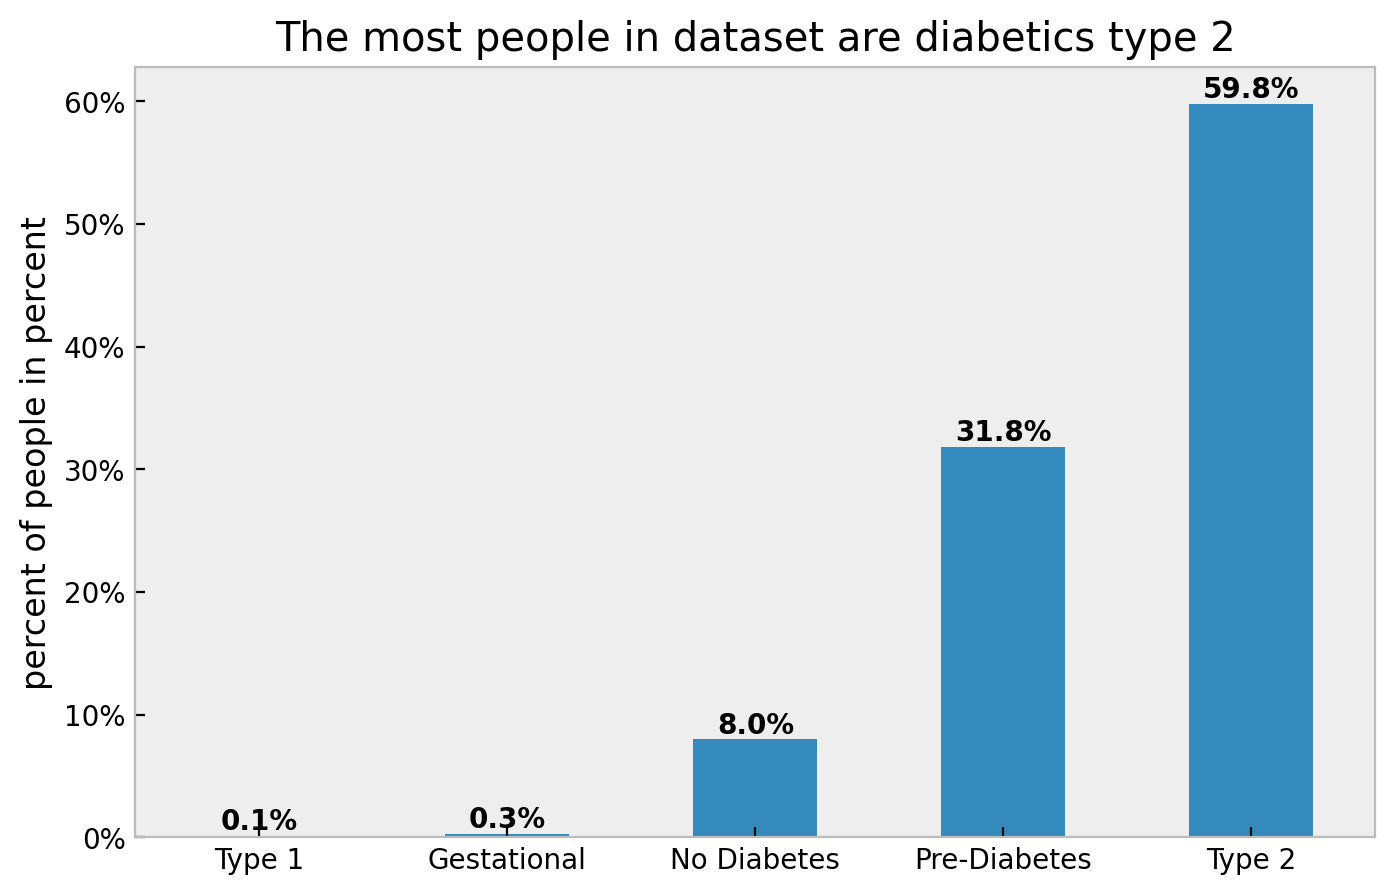

In [38]:
#Number of people in each class in diabetes_stage column in percent
print('Number of people in each class in diabetes_stage column in percent')
plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(8, 5), dpi=200)
pd.crosstab(index=df['diabetes_stage'], columns='count', normalize='columns').sort_values(by='count').plot(kind='bar', legend=False, ax=ax);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.1%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel=None, ylabel='percent of people in percent', title='The most people in dataset are diabetics type 2');
ax.grid(False);

The percentage of each class of gender in this dataset


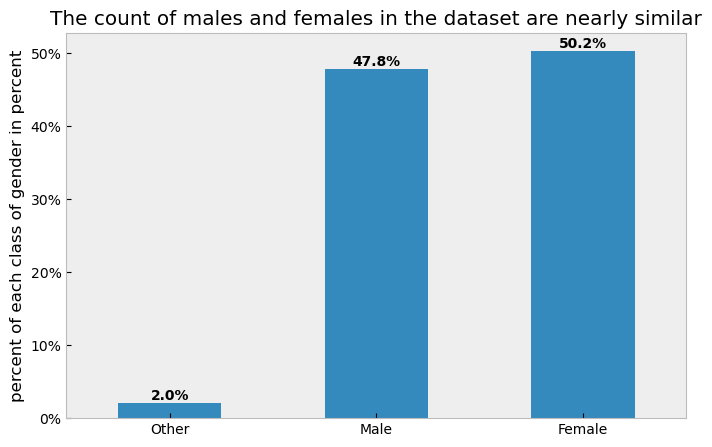

In [39]:
#The percentage of each class of gender in this dataset
print('The percentage of each class of gender in this dataset')
fig, ax=plt.subplots(figsize=(8, 5))
pd.crosstab(index=df['gender'], columns='count', normalize='columns').sort_values(by='count').plot(kind='bar', legend=False, ax=ax);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.1%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel=None, ylabel='percent of each class of gender in percent', title='The count of males and females in the dataset are nearly similar');
ax.grid(False);

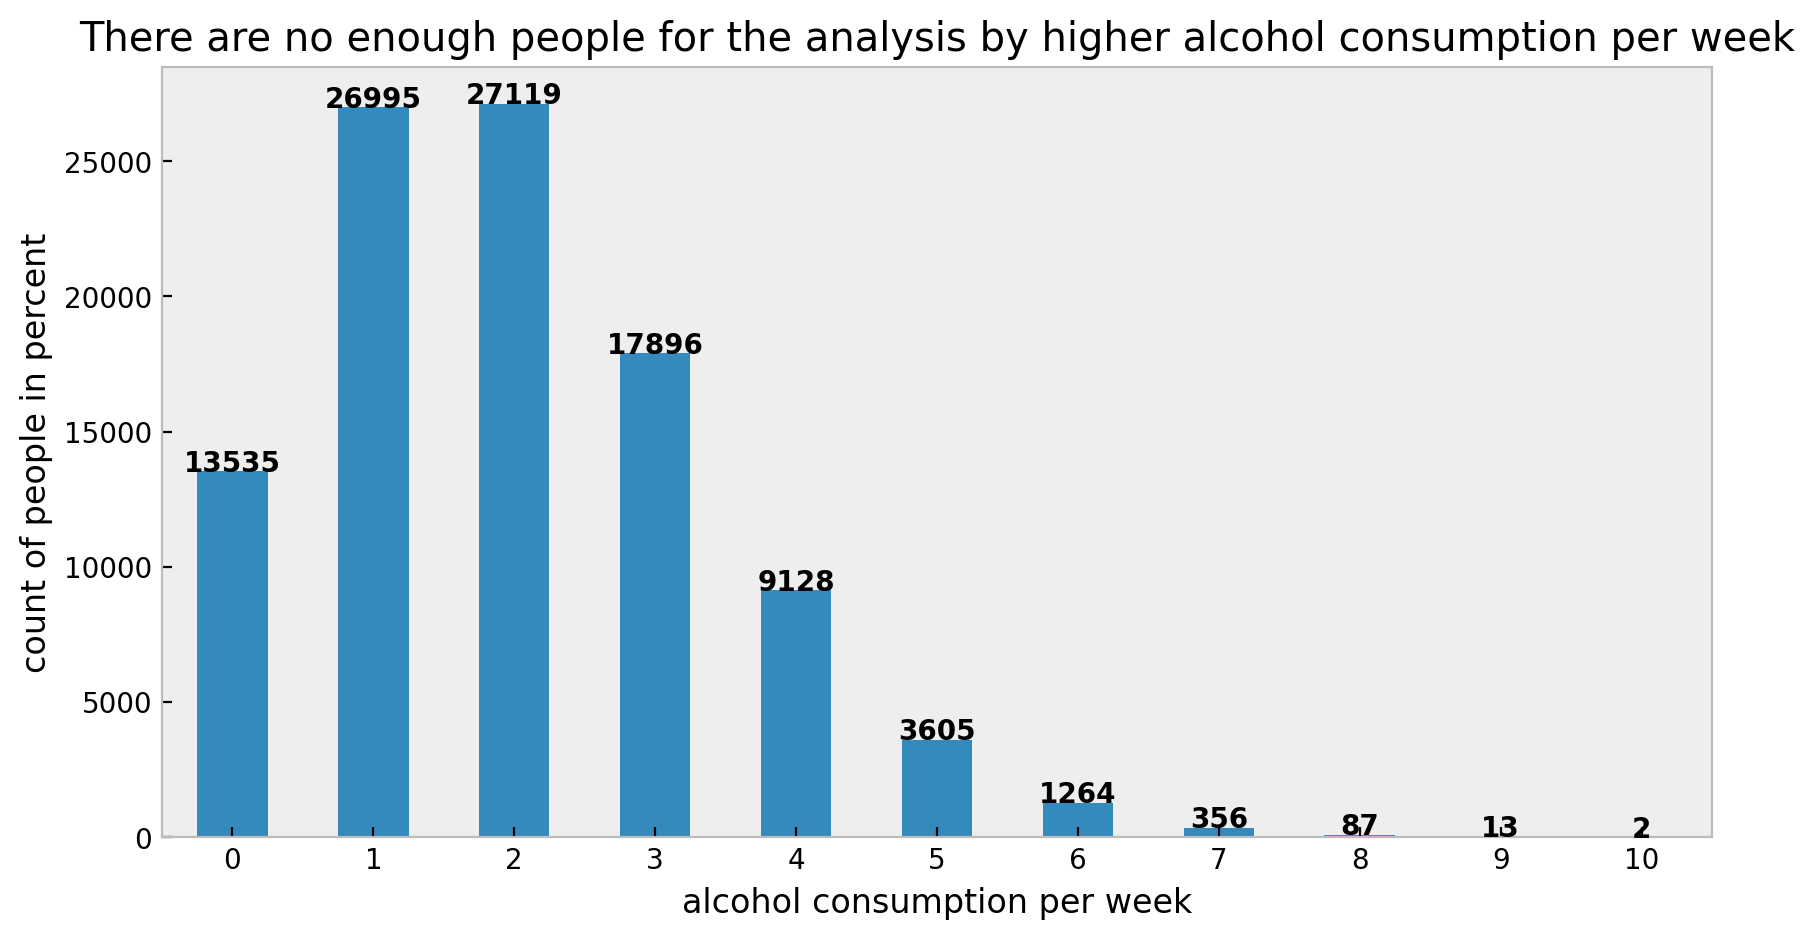

In [40]:
from matplotlib import legend


fig, ax=plt.subplots(figsize=(10, 5), dpi=200);
alcohol_consumption_count = pd.crosstab(index=df['alcohol_consumption_per_week'], columns='count')
alcohol_consumption_count.plot(kind='bar', ax=ax, legend=False)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.007,
        f"{height}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel='alcohol consumption per week', ylabel='count of people in percent', title='There are no enough people for the analysis by higher alcohol consumption per week');
ax.grid(False);

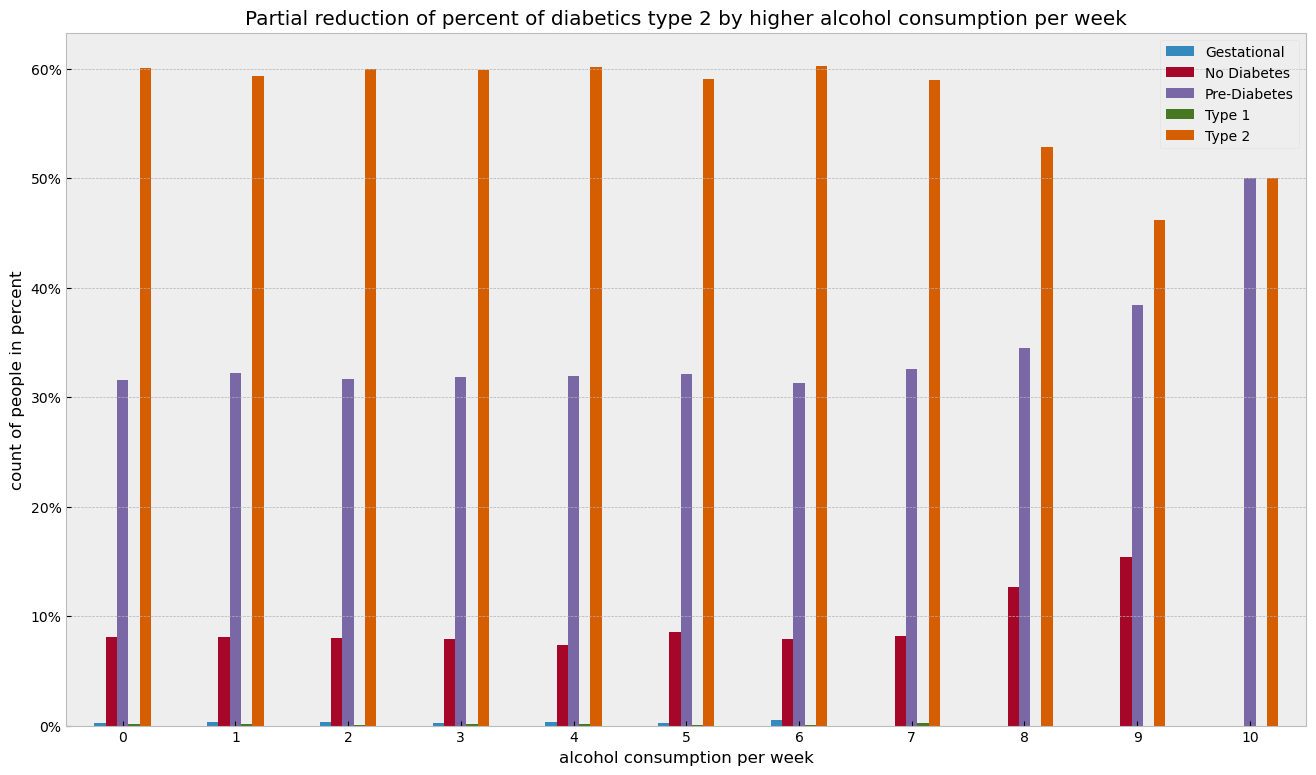

In [41]:
#Visualization of groupping of alkohol consumption per week by diabetes stage classesn
fig, ax=plt.subplots(figsize=(16, 9));
pd.crosstab(index=df['alcohol_consumption_per_week'], columns=df["diabetes_stage"], normalize="index").plot(kind="bar", ax=ax, legend=True);
plt.legend(framealpha=0.3);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel='alcohol consumption per week', ylabel='count of people in percent', title='Partial reduction of percent of diabetics type 2 by higher alcohol consumption per week');
ax.grid(False, axis='x');

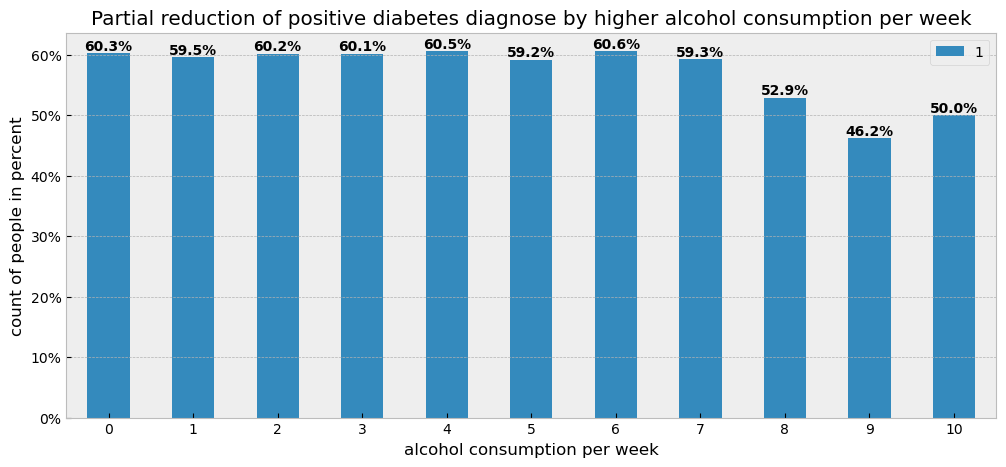

In [42]:
#Visualization of groupping of alkohol consumption per week by positive diagnosed diabetes
alcohol_consumption_diagnosed_diabetes = pd.crosstab(index=df['alcohol_consumption_per_week'], columns=df["diagnosed_diabetes"], normalize="index")
alcohol_consumption_diagnosed_diabetes_1 = alcohol_consumption_diagnosed_diabetes.iloc[:, 1]
fig, ax=plt.subplots(figsize=(12, 5));
alcohol_consumption_diagnosed_diabetes_1.plot(kind="bar", ax=ax, legend=True);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.1%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel='alcohol consumption per week', ylabel='count of people in percent', title='Partial reduction of positive diabetes diagnose by higher alcohol consumption per week');
ax.grid(False, axis='x');


In [43]:
#Count of people with family history diabetes in percent in the dataset
fig, ax=plt.subplots(figsize=(10, 5));
family_history_diabetes_count = pd.crosstab(index=df['family_history_diabetes'], columns='count', normalize='columns')
family_history_diabetes_count.plot(kind='bar', ax=ax, legend=False)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.2%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set_xticklabels(['negative', 'positive'])
ax.set(xlabel='family history diabetes', ylabel='count of people in percent', title='There are relatively high number of people with no family history of diabetes in the dataset');
ax.grid(False);

In [44]:
#Visualization of groupping of family history diabetes by diabetes stage classesn
fig, ax=plt.subplots(figsize=(16, 9), dpi=200);
pd.crosstab(index=df['diabetes_stage'], columns=df["family_history_diabetes"], normalize="columns").plot(kind="bar", ax=ax, legend=True);
plt.legend(framealpha=0.3);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.2%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel='family history diabetes', ylabel='count of people in percent', title='Positive family history diabetes leads to higher positive diabetes type 2 ratio');
ax.grid(False);
ax.legend(['negative family history diabetes', 'positive family history diabetes']);

In [45]:
df_diabetes_stage_type1 = df[df['diabetes_stage'] == 'Type 1'].copy()
df_diabetes_stage_no = df[df['diabetes_stage'] == 'No Diabetes'].copy()
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 4))
pd.crosstab(index=df_diabetes_stage_type1['family_history_diabetes'], columns=df_diabetes_stage_type1["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[0], legend=False)
pd.crosstab(index=df_diabetes_stage_no['family_history_diabetes'], columns=df_diabetes_stage_no["diabetes_stage"], normalize="columns").plot(kind="bar", ax=ax[1], legend=False)
ax[0].set_title(f'Diabetes type 1 groupped by family_history_diabetes')
ax[1].set_title(f'Not diabetes groupped by family_history_diabetes')
ax[0].xaxis.set_tick_params(labelrotation=0)
ax[1].xaxis.set_tick_params(labelrotation=0)
ax[0].set_xlabel('family_history_diabetes')
ax[1].set_xlabel('family_history_diabetes')
ax[0].set_ylabel('percent of people')
ax[1].set_ylabel('percent of people')
ax[0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]); 
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.2%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax[0].xaxis.set_tick_params(labelrotation=0);

ax[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0].get_yticks()]); 
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.2%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax[1].xaxis.set_tick_params(labelrotation=0);
ax[0].grid(False, axis='x');
ax[1].grid(False, axis='x');

In [46]:
#Visualization of groupping of family history diabetes by positive diagnosed diabetes
family_history_diagnosed_diabetes = pd.crosstab(index=df['family_history_diabetes'], columns=df["diagnosed_diabetes"], normalize="index")
family_history_diagnosed_diabetes_1 = family_history_diagnosed_diabetes.iloc[:, 1]
fig, ax=plt.subplots(figsize=(12, 5));
family_history_diagnosed_diabetes_1.plot(kind="bar", ax=ax, legend=False);
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]); 
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.1%}",
        ha='center',
        fontweight='bold',
        fontsize=10
    );
ax.xaxis.set_tick_params(labelrotation=0);
ax.set(xlabel='family history diabetes', ylabel='count of people in percent', title='High positive diagnosed diabetes ratio by positive family history diabetes');
ax.grid(False);
plt.legend(loc='upper right');


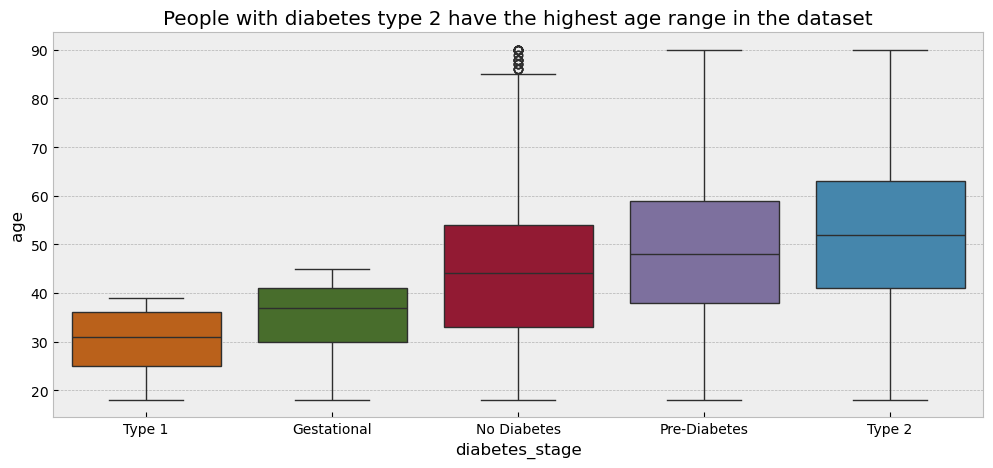

In [47]:
#Visualization of diabetes_stages classes by to age 
warnings.filterwarnings("ignore")
fig, ax=plt.subplots(figsize=(12, 5));
order = df.groupby('diabetes_stage')['age'].median().sort_values().index;
sns.boxplot(y='age', x='diabetes_stage', data=df, hue='diabetes_stage', order=order, ax=ax);
ax.grid(False, axis='x');
ax.set_title('People with diabetes type 2 have the highest age range in the dataset');

In [65]:
#Visualization of No Diabetes, Pre Diabetes and Type 2 bei age in histogram

from turtle import title


selected_stages = ['Type 2', 'No Diabetes', 'Pre-Diabetes']
colors = {'Type 2': 'tab:red', 'No Diabetes': 'tab:blue', 'Pre-Diabetes': 'tab:green'}
df_diabetic_stage_type2_prediabetes_no = df[df['diabetes_stage'].isin(['Type 2', 'Pre-Diabetes', 'No Diabetes'])].copy()
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
for stage, group in df_diabetic_stage_type2_prediabetes_no.groupby('diabetes_stage'):
    if stage in selected_stages:
        group['age'].plot(
            kind='hist',
            density=True,
            alpha=0.5,
            color=colors[stage],
            ax=ax,
            label=stage, legend=True, bins=50)

ax.set_xlabel('age')
ax.set_ylabel('density')
ax.set_title('young people have often no diabetes in contrast to old people')
ax.grid(False);
plt.legend(title='diabetes_stage')
plt.show()


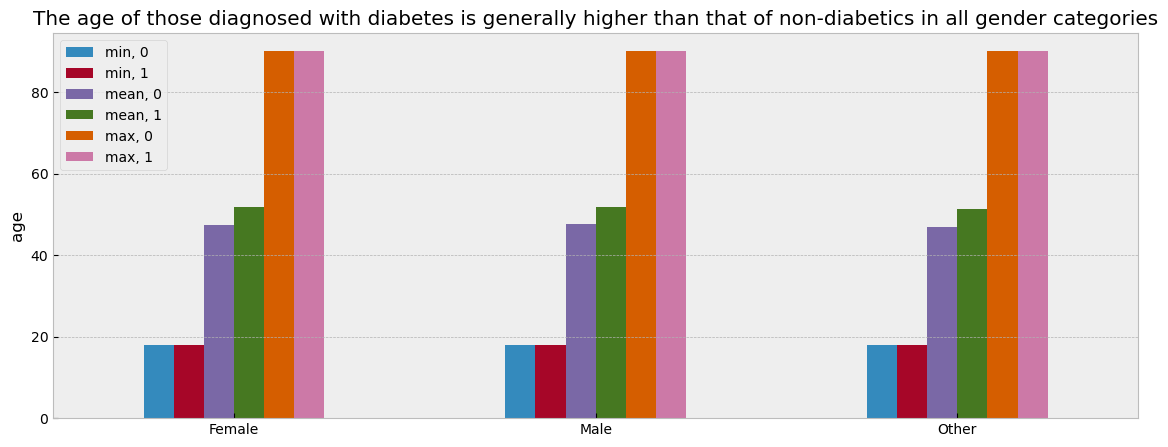

In [49]:
#Comparison beteen the age of women and men by diagnosed diabetes
fig, ax = plt.subplots(figsize=(14, 5))
pd.crosstab(df["gender"], 
            columns=df["diagnosed_diabetes"],
            values=df["age"],
            aggfunc=["min", "mean", "max"]).plot(kind = 'bar', ax=ax);
ax.set_ylabel('age');
plt.legend(['min, 0', 'min, 1', 'mean, 0', 'mean, 1', 'max, 0', 'max, 1']);
ax.set_title('The age of those diagnosed with diabetes is generally higher than that of non-diabetics in all gender categories');
ax.set_xlabel(None)
ax.xaxis.set_tick_params(labelrotation=0);
ax.grid(False, axis='x');

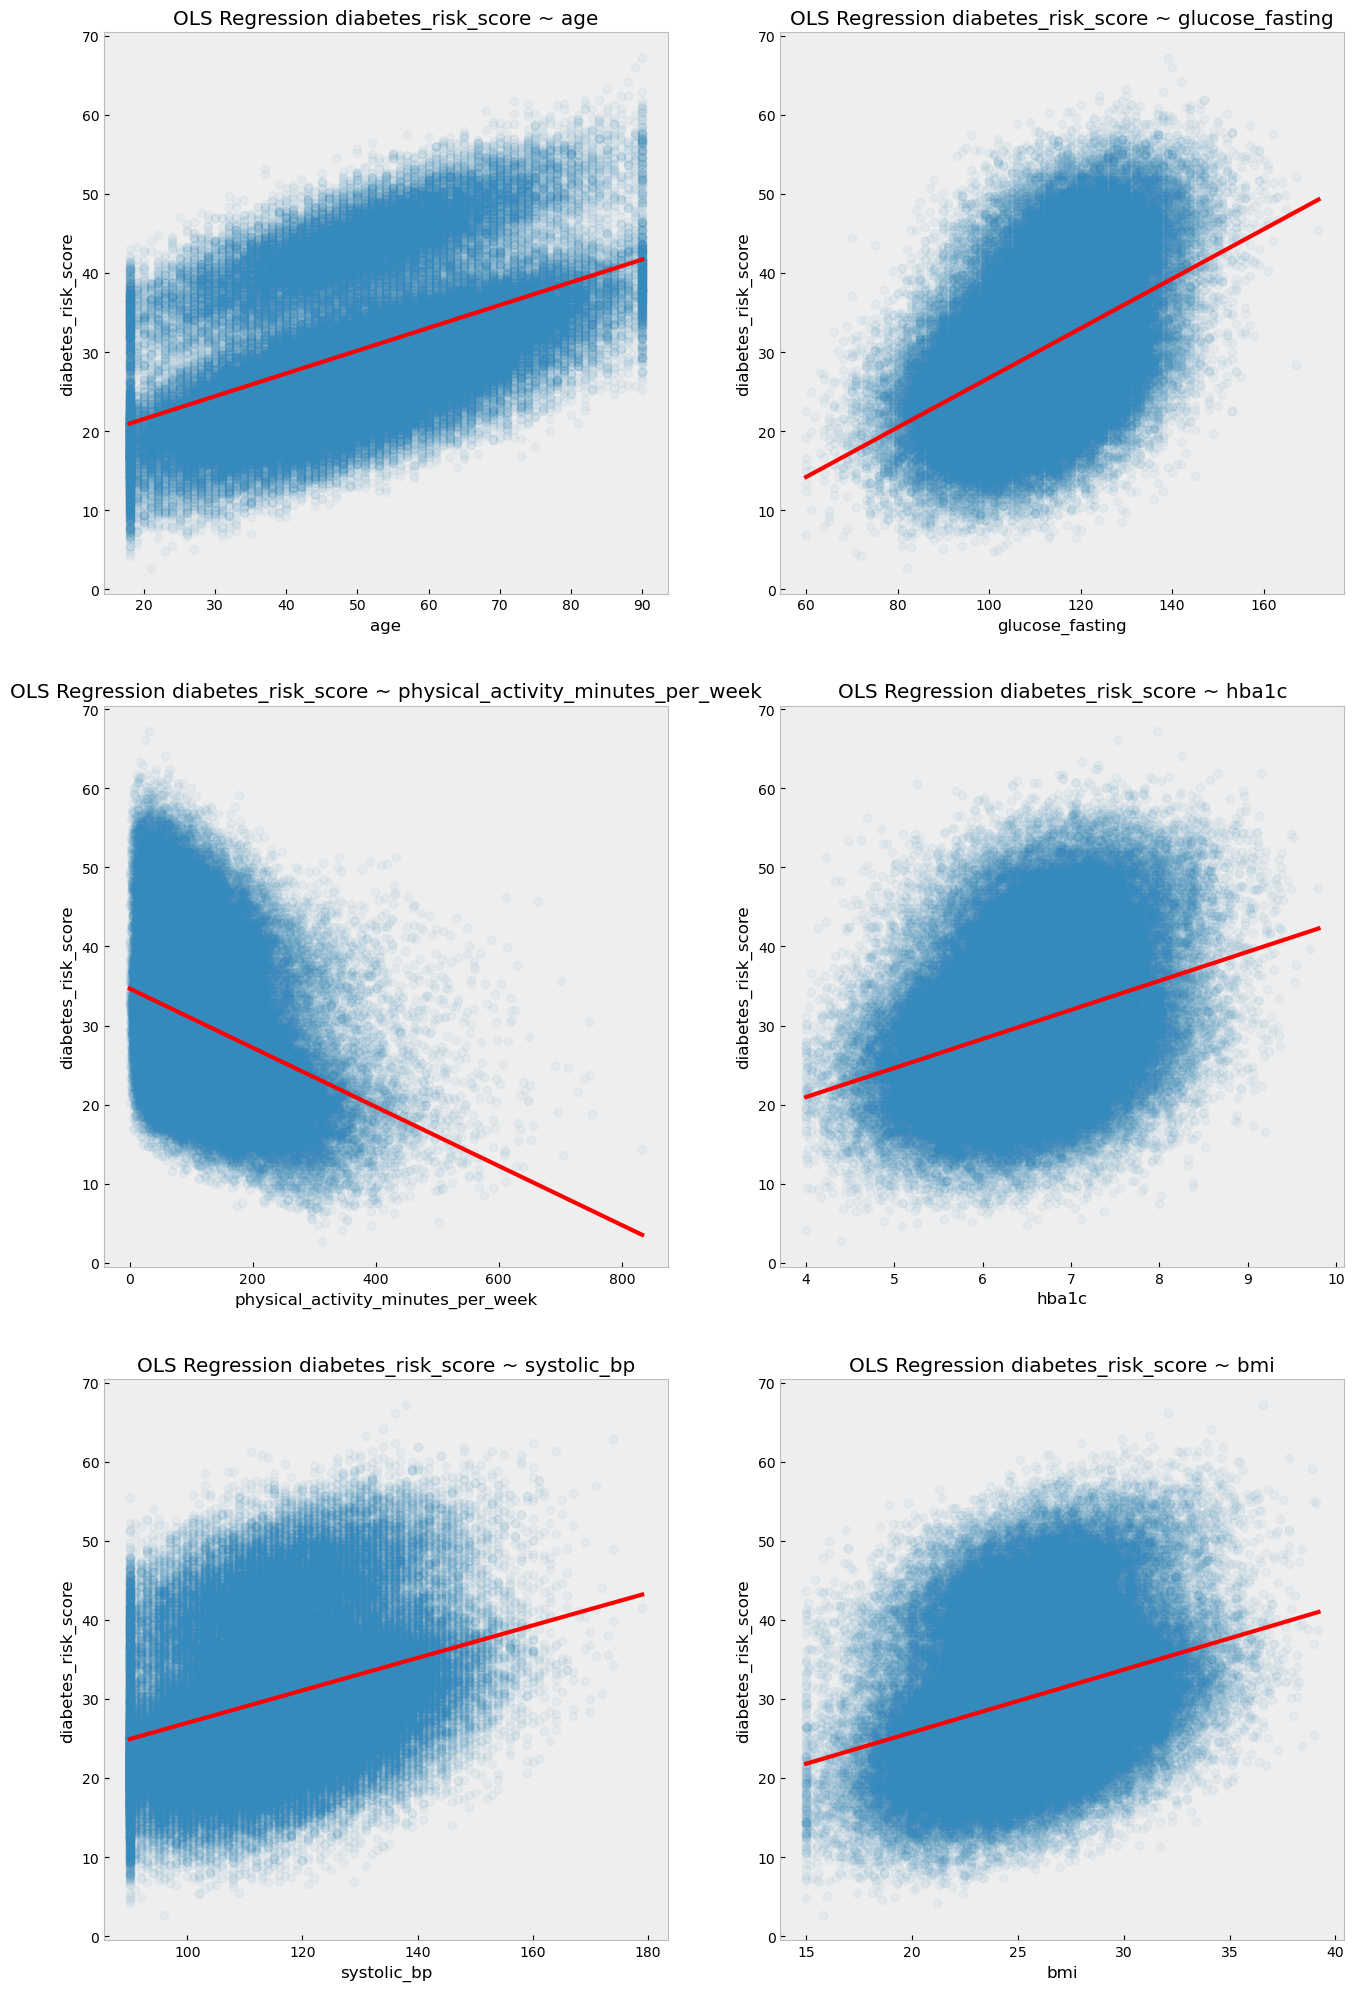

In [50]:
#Visualization of linear regression by diabetes_risk_score column
diabetes_risk_score_correlated_columns_1 = ['age', 'physical_activity_minutes_per_week', 'systolic_bp']
diabetes_risk_score_correlated_columns_2 = ['glucose_fasting', 'hba1c', 'bmi']
fig,ax = plt.subplots(nrows=len(diabetes_risk_score_correlated_columns_1), ncols=2, figsize=(16, 4*len(diabetes_risk_score_correlated_columns_1)))
for i, col in enumerate(diabetes_risk_score_correlated_columns_1):
    
    sns.regplot(x = col, y = 'diabetes_risk_score', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i, 0], scatter_kws={"alpha": 0.05})
    ax[i, 0].set(xlabel = col,
    ylabel = 'diabetes_risk_score',
    title = f'OLS Regression diabetes_risk_score ~ {col}');
    ax[i, 0].grid(False)
for i, col in enumerate(diabetes_risk_score_correlated_columns_2):
    sns.regplot(x = col, y = 'diabetes_risk_score', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i, 1], scatter_kws={"alpha": 0.05})
    ax[i, 1].set(xlabel = col,
    ylabel = 'diabetes_risk_score',
    title = f'OLS Regression diabetes_risk_score ~ {col}');
    ax[i, 1].grid(False)


plt.subplots_adjust(top=1.7)
plt.tight_layout;   

In [51]:
#Visualization of linear regression by bmi(obesity)
bmi_correlated_columns_1 = ['waist_to_hip_ratio', 'insulin_level']
bmi_correlated_columns_2 = ['triglycerides', 'diabetes_risk_score']
fig,ax = plt.subplots(nrows=len(bmi_correlated_columns_1), ncols=2, figsize=(16, 4*len(bmi_correlated_columns_1)))
for i, col in enumerate(bmi_correlated_columns_1):
    sns.regplot(x = col, y = 'bmi', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i, 0], scatter_kws={"alpha": 0.05})
    ax[i, 0].set(xlabel = col,
    ylabel = 'bmi',
    title = f'OLS Regression bmi ~ {col}');
    ax[i, 0].grid(False)
for i, col in enumerate(bmi_correlated_columns_2):
    sns.regplot(x = col, y = 'bmi', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i, 1], scatter_kws={"alpha": 0.05})
    ax[i, 1].set(xlabel = col,
    ylabel = 'bmi',
    title = f'OLS Regression bmi ~ {col}');
    ax[i, 1].grid(False)


plt.subplots_adjust(top=1.7)
plt.tight_layout;

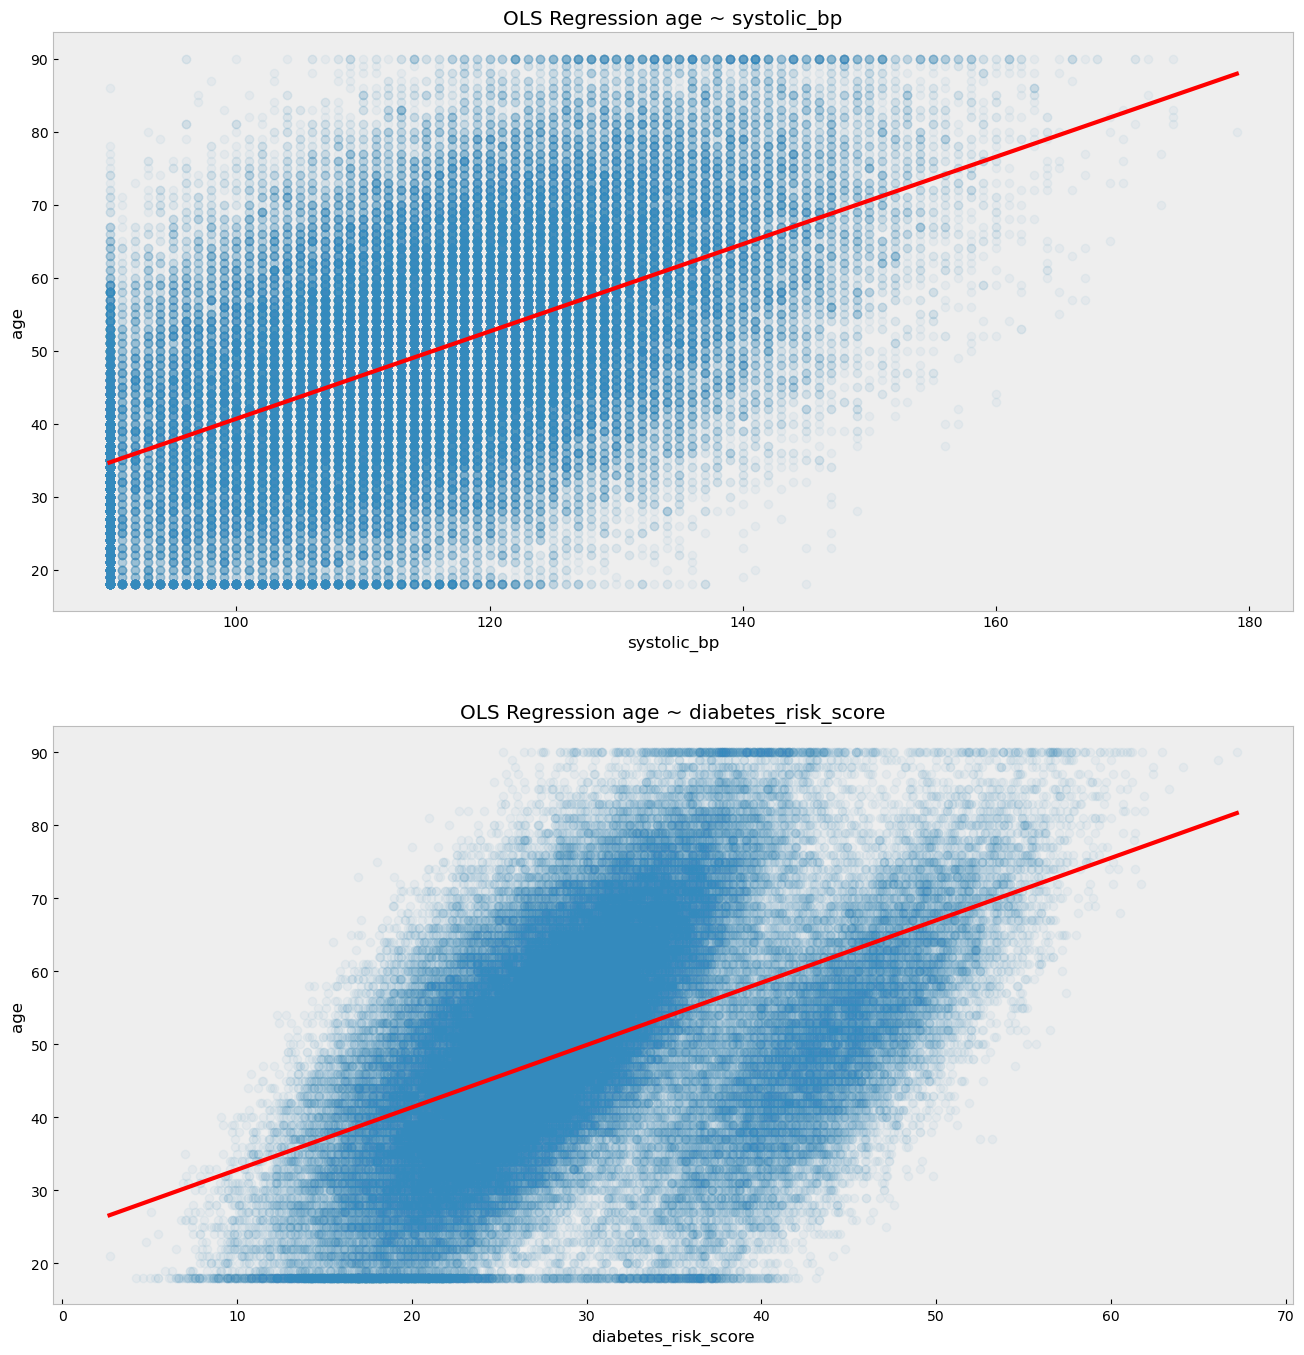

In [52]:
#Visualization of linear regression by age
age_correlated_columns = ['systolic_bp', 'diabetes_risk_score']
fig,ax = plt.subplots(nrows=len(age_correlated_columns), ncols=1, figsize=(16, 4*len(age_correlated_columns)))
for i, col in enumerate(age_correlated_columns):
    sns.regplot(x = col, y = 'age', data = df, ci = None, line_kws={"color": "red"}, ax=ax[i], scatter_kws={"alpha": 0.05})
    ax[i].set(xlabel = col,
    ylabel = 'age',
    title = f'OLS Regression age ~ {col}');
    ax[i].grid(False)

plt.subplots_adjust(top=1.7)
plt.tight_layout;

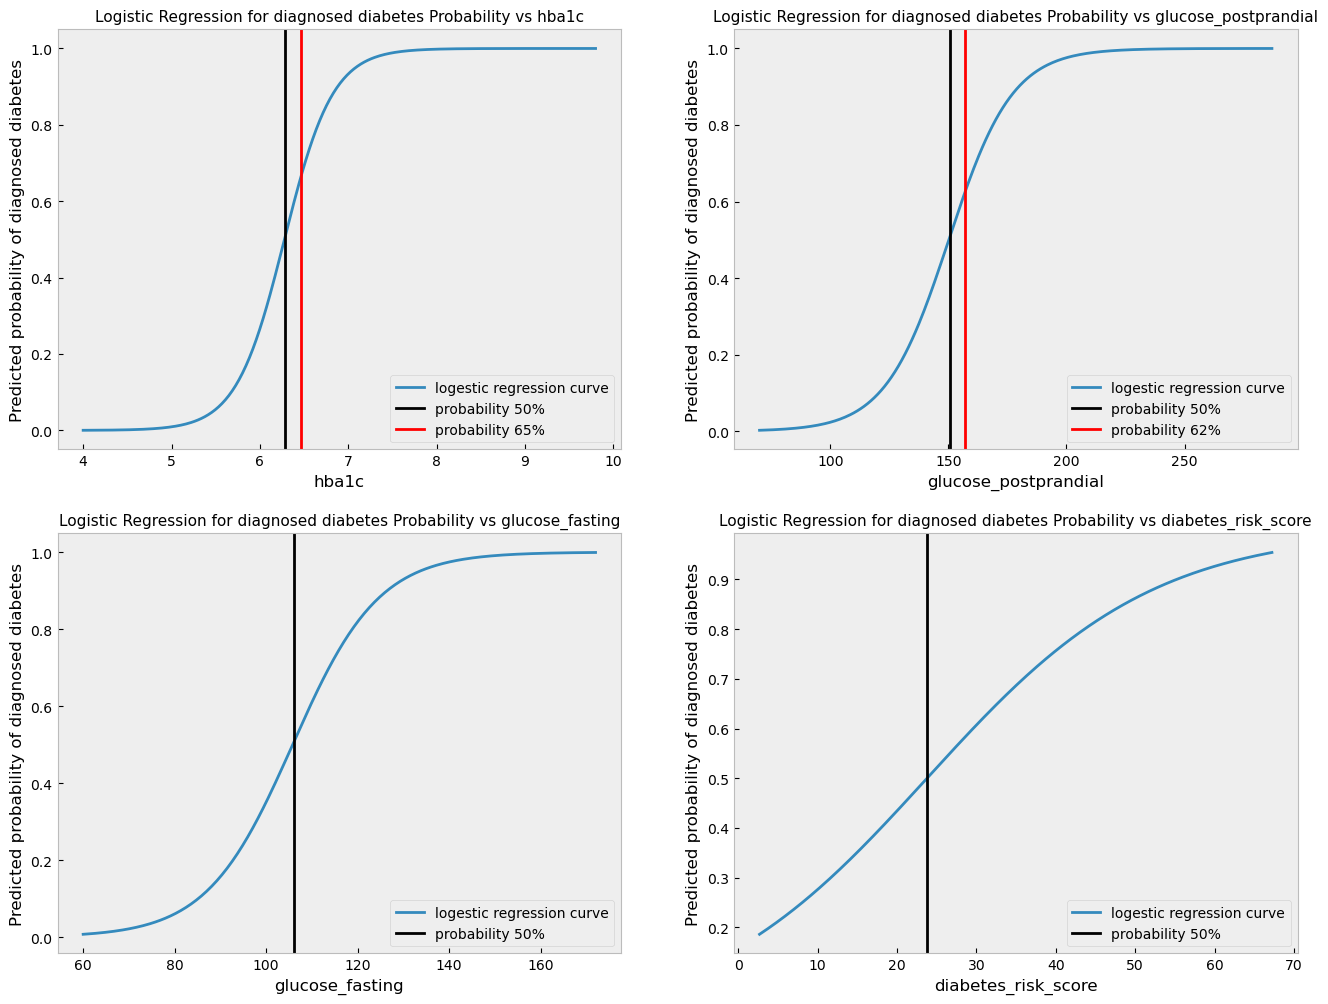

In [53]:
#Visualization of logistic regression by diagnosed_diabetes column
diagnosed_diabetes_correlated_columns = ['hba1c', 'glucose_postprandial', 'glucose_fasting', 'diabetes_risk_score']
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 3*len(diagnosed_diabetes_correlated_columns)))
#hba1c
value_range, predicted_hba1c = logistic_prediction(df, feature='hba1c', target='diagnosed_diabetes')
ax[0, 0].plot(value_range, predicted_hba1c);
ax[0, 0].set_xlabel("hba1c");
ax[0, 0].set_ylabel("Predicted probability of diagnosed diabetes");
ax[0, 0].set_title('Logistic Regression for diagnosed diabetes Probability vs hba1c', fontsize=11)
p_50_index = predicted_hba1c[predicted_hba1c>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[0, 0].axvline(p_50_value, color='black')
p_65_index = predicted_hba1c[predicted_hba1c>=0.65].index[0]
p_65_value = value_range[p_65_index]
ax[0, 0].axvline(p_65_value, color='red')
ax[0, 0].legend(['logestic regression curve', 'probability 50%', 'probability 65%']);
ax[0, 0].grid(False)

#glucose_postprandial
value_range, predicted_glucose_postprandial = logistic_prediction(df, feature='glucose_postprandial', target='diagnosed_diabetes')
ax[0, 1].plot(value_range, predicted_glucose_postprandial);
ax[0, 1].set_xlabel("glucose_postprandial");
ax[0, 1].set_ylabel("Predicted probability of diagnosed diabetes")
p_50_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.5].index[0]
ax[0, 1].set_title('Logistic Regression for diagnosed diabetes Probability vs glucose_postprandial', fontsize=11)
p_50_value = value_range[p_50_index]
ax[0, 1].axvline(p_50_value, color='black');
p_62_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.62].index[0]
p_62_value = value_range[p_62_index]
ax[0, 1].axvline(p_62_value, color='red');
ax[0, 1].legend(['logestic regression curve', 'probability 50%', 'probability 62%']);
ax[0, 1].grid(False)

#glucose_fasting
value_range, predicted_glucose_fasting = logistic_prediction(df, feature='glucose_fasting', target='diagnosed_diabetes')
ax[1, 0].plot(value_range, predicted_glucose_fasting);
ax[1, 0].set_xlabel("glucose_fasting");
ax[1, 0].set_ylabel("Predicted probability of diagnosed diabetes");
ax[1, 0].set_title('Logistic Regression for diagnosed diabetes Probability vs glucose_fasting', fontsize=11)
p_50_index = predicted_glucose_fasting[predicted_glucose_fasting >=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[1, 0].axvline(p_50_value, color='black');
ax[1, 0].legend(['logestic regression curve', 'probability 50%'], loc='lower right');
ax[1, 0].grid(False)

#diabetes_risk_score
value_range, predicted_diabetes_risk_score = logistic_prediction(df, feature='diabetes_risk_score', target='diagnosed_diabetes')
ax[1, 1].plot(value_range, predicted_diabetes_risk_score);
ax[1, 1].set_xlabel("diabetes_risk_score");
ax[1, 1].set_ylabel("Predicted probability of diagnosed diabetes");
ax[1, 1].set_title('Logistic Regression for diagnosed diabetes Probability vs diabetes_risk_score', fontsize=11)
p_50_index = predicted_diabetes_risk_score[predicted_diabetes_risk_score>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[1, 1].axvline(p_50_value, color='black')
ax[1, 1].legend(['logestic regression curve', 'probability 50%']);
ax[1, 1].grid(False)

plt.tight_layout;

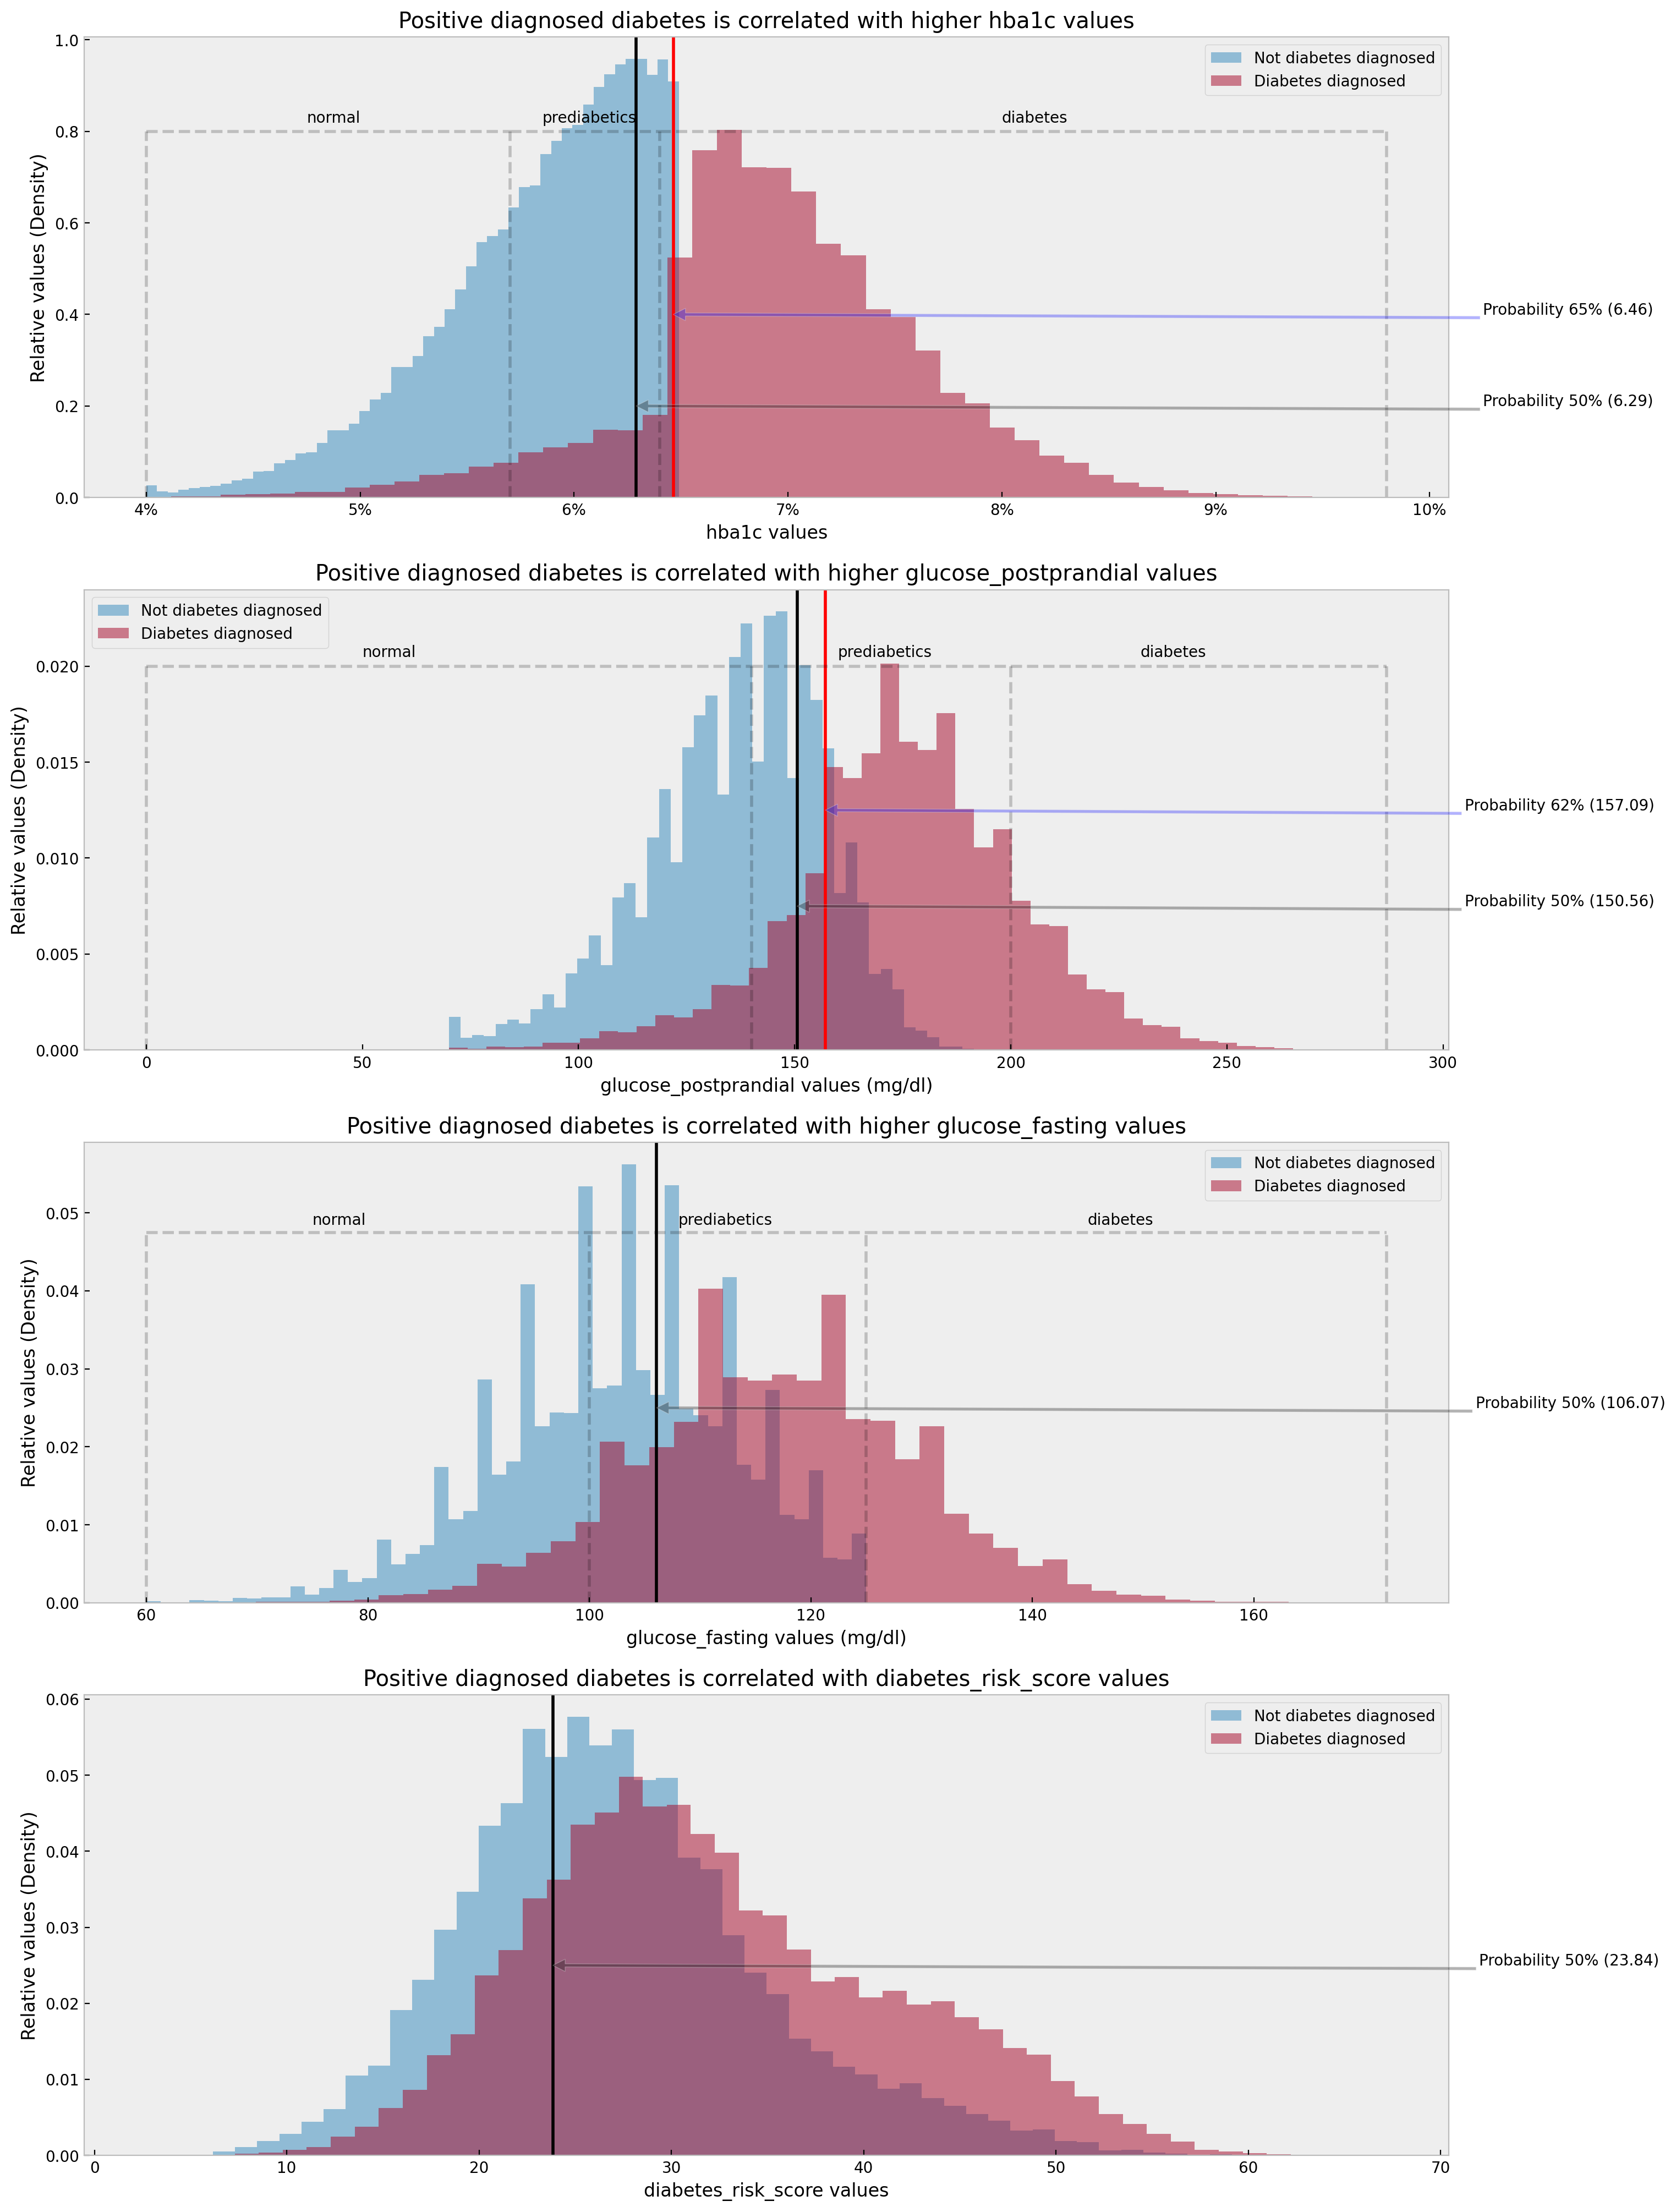

In [54]:
#Visualization by histogram for logistic regression by diagnosed_diabetes column
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 25), dpi=200)
#hba1c
df.groupby('diagnosed_diabetes')['hba1c'].plot(kind='hist', ax=ax[0], legend=True, alpha=0.5, density=True, bins=50);
ax[0].set_title('Positive diagnosed diabetes is correlated with higher hba1c values');
ax[0].set_xlabel('hba1c values');
ax[0].set_ylabel('Relative values (Density)')
ax[0].legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax[0].axvline(6.29, color='black');
ax[0].axvline(6.4635, color='red');
ax[0].grid(False)
ax[0].set_xticklabels(['{}%'.format(int(x)) for x in ax[0].get_xticks()])
ax[0].hlines(y=0.8, xmax=6.4, xmin=5.7, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=5.7, ymax=0.8, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=6.4, ymax=0.8, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].hlines(y=0.8, xmax=9.8, xmin=6.4, color='black', linestyle='--', alpha=0.2)
ax[0].hlines(y=0.8, xmax=5.7, xmin=4, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=4, ymax=0.8, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=9.8, ymax=0.8, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].text(5.85, 0.82, s='prediabetics')
ax[0].text(8, 0.82, s='diabetes')
ax[0].text(4.75, 0.82, s='normal')
ax[0].annotate(text='Probability 50% (6.29)',
          xy=(6.29, 0.2),
          xytext=(10.25, 0.2),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));
ax[0].annotate(text='Probability 65% (6.46)',
          xy=(6.4635, 0.4),
          xytext=(10.25, 0.4),
          arrowprops=dict(facecolor='blue', alpha=0.3, width=2, headwidth=8, headlength=8));

#glucose_postprandial
df.groupby('diagnosed_diabetes')['glucose_postprandial'].plot(kind='hist', ax=ax[1], legend=True, alpha=0.5, density=True, bins=50);
ax[1].set_title('Positive diagnosed diabetes is correlated with higher glucose_postprandial values');
ax[1].set_xlabel('glucose_postprandial values (mg/dl)');
ax[1].set_ylabel('Relative values (Density)')
ax[1].legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax[1].axvline(150.56, color='black');
ax[1].axvline(157.09, color='red');
ax[1].grid(False)
ax[1].hlines(y=0.020, xmax=200, xmin=140, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=140, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=200, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].hlines(y=0.020, xmax=df['glucose_postprandial'].max(), xmin=200, color='black', linestyle='--', alpha=0.2)
ax[1].hlines(y=0.020, xmax=140, xmin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=0, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=df['glucose_postprandial'].max(), ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].text(160, 0.0205, s='prediabetics')
ax[1].text(230, 0.0205, s='diabetes')
ax[1].text(50, 0.0205, s='normal')
ax[1].annotate(text='Probability 50% (150.56)',
          xy=(150.56, 0.0075),
          xytext=(305, 0.0075),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[1].annotate(text='Probability 62% (157.09)',
          xy=(157.09, 0.0125),
          xytext=(305, 0.0125),
          arrowprops=dict(facecolor='blue', alpha=0.3, width=2, headwidth=8, headlength=8));

#glucose_fasting 
df.groupby('diagnosed_diabetes')['glucose_fasting'].plot(kind='hist', ax=ax[2], legend=True, alpha=0.5, density=True, bins=50);
ax[2].set_title('Positive diagnosed diabetes is correlated with higher glucose_fasting values');
ax[2].set_xlabel('glucose_fasting values (mg/dl)');
ax[2].set_ylabel('Relative values (Density)')
ax[2].legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax[2].axvline(106.07, color='black');
ax[2].grid(False)
ax[2].hlines(y=0.0475, xmax=125, xmin=100, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=100, ymax=0.0475, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=125, ymax=0.0475, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].hlines(y=0.0475, xmax=df['glucose_fasting'].max(), xmin=125, color='black', linestyle='--', alpha=0.2)
ax[2].hlines(y=0.0475, xmax=100, xmin=df['glucose_fasting'].min(), color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=df['glucose_fasting'].min(), ymax=0.0475, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=df['glucose_fasting'].max(), ymax=0.0475, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].text(108, 0.0485, s='prediabetics')
ax[2].text(145, 0.0485, s='diabetes')
ax[2].text(75, 0.0485, s='normal')
ax[2].annotate(text='Probability 50% (106.07)',
          xy=(106.07, 0.025),
          xytext=(180, 0.025),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

#diabetes_risk_score
df.groupby('diagnosed_diabetes')['diabetes_risk_score'].plot(kind='hist', ax=ax[3], legend=True, alpha=0.5, density=True, bins=50);
ax[3].set_title('Positive diagnosed diabetes is correlated with diabetes_risk_score values');
ax[3].set_xlabel('diabetes_risk_score values');
ax[3].set_ylabel('Relative values (Density)')
ax[3].legend(['Not diabetes diagnosed', 'Diabetes diagnosed'])
ax[3].axvline(23.84, color='black');
ax[3].grid(False)
ax[3].annotate(text='Probability 50% (23.84)',
          xy=(23.84, 0.025),
          xytext=(72, 0.025),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));


In [55]:
#Making of new dataphram with only two categories Type 2 and No Diabetes by diabetes_stage column
df_diabetic_stage_type2_no = df[df['diabetes_stage'].isin(['Type 2', 'No Diabetes'])].copy()
df_diabetic_stage_type2_no['diabetes_stage'] = df_diabetic_stage_type2_no['diabetes_stage'].map({'No Diabetes': 0, 'Type 2': 1}).astype(int)
df_diabetic_stage_type2_no['diabetes_stage'].dtype

dtype('int64')

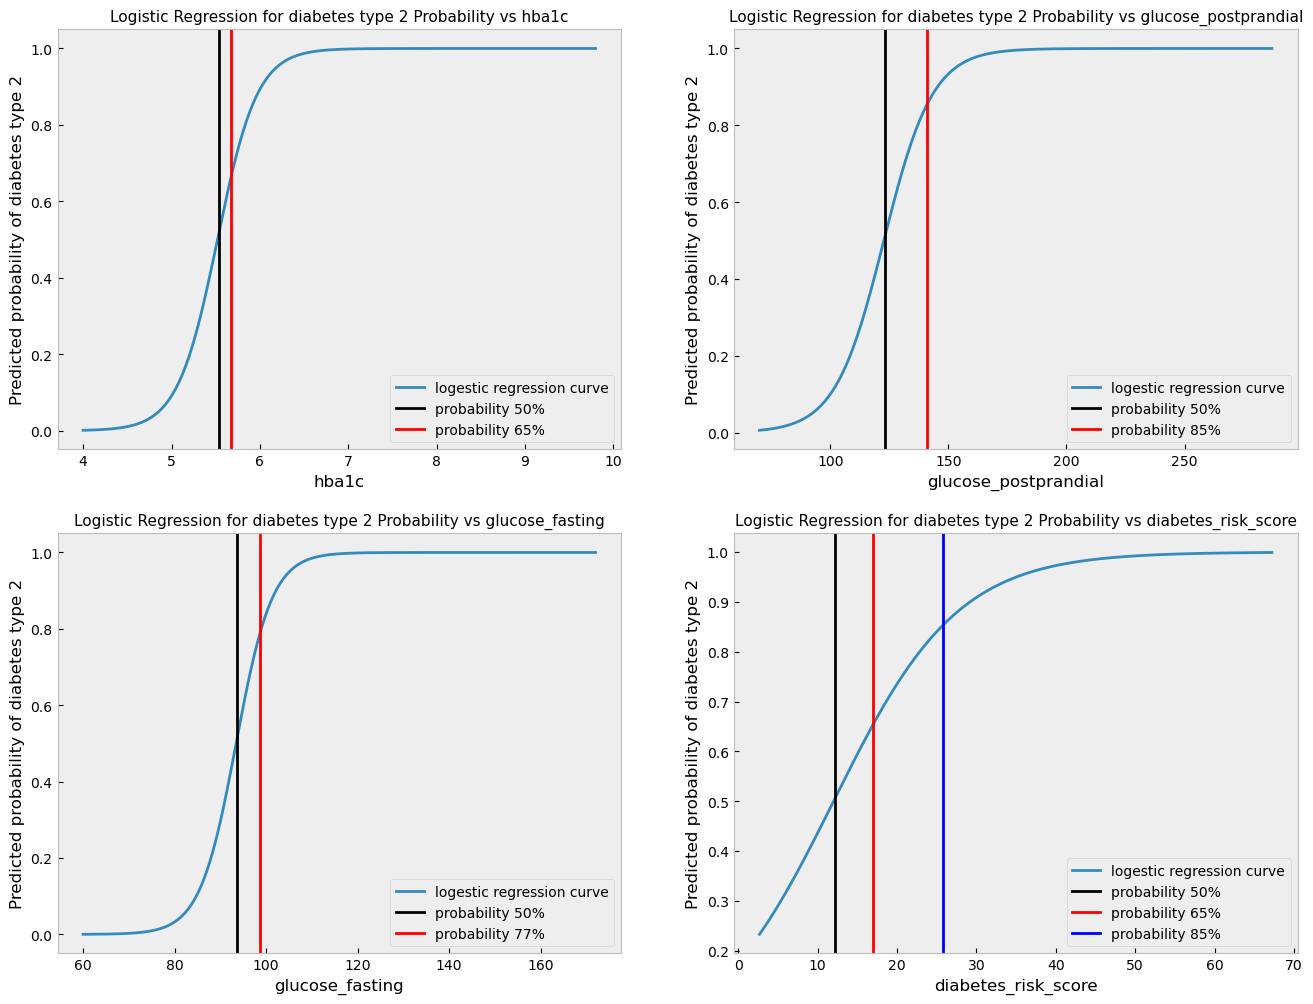

In [56]:
#Logestic regression with hba1c by diabetes type 2
diabetes_type2_correlated_columns = ['hba1c', 'glucose_postprandial', 'glucose_fasting', 'diabetes_risk_score']
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 3*len(diabetes_type2_correlated_columns)))
#hba1c
value_range, predicted_hba1c = logistic_prediction(df_diabetic_stage_type2_no, feature='hba1c', target='diabetes_stage')
ax[0, 0].plot(value_range, predicted_hba1c);
ax[0, 0].set_xlabel("hba1c");
ax[0, 0].set_ylabel("Predicted probability of diabetes type 2");
ax[0, 0].set_title('Logistic Regression for diabetes type 2 Probability vs hba1c', fontsize=11)
p_50_index = predicted_hba1c[predicted_hba1c>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[0, 0].axvline(p_50_value, color='black')
p_65_index = predicted_hba1c[predicted_hba1c>=0.65].index[0]
p_65_value = value_range[p_65_index]
ax[0, 0].axvline(p_65_value, color='red')
ax[0, 0].legend(['logestic regression curve', 'probability 50%', 'probability 65%']);
ax[0, 0].grid(False)

#glucose_postprandial
value_range, predicted_glucose_postprandial = logistic_prediction(df_diabetic_stage_type2_no, feature='glucose_postprandial', target='diabetes_stage')
ax[0, 1].plot(value_range, predicted_glucose_postprandial);
ax[0, 1].set_xlabel("glucose_postprandial");
ax[0, 1].set_ylabel("Predicted probability of diabetes type 2")
p_50_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.5].index[0]
ax[0, 1].set_title('Logistic Regression for diabetes type 2 Probability vs glucose_postprandial', fontsize=11)
p_50_value = value_range[p_50_index]
ax[0, 1].axvline(p_50_value, color='black');
p_85_index = predicted_glucose_postprandial[predicted_glucose_postprandial>=0.85].index[0]
p_85_value = value_range[p_85_index]
ax[0, 1].axvline(p_85_value, color='red');
ax[0, 1].legend(['logestic regression curve', 'probability 50%', 'probability 85%']);
ax[0, 1].grid(False)

#glucose_fasting
value_range, predicted_glucose_fasting = logistic_prediction(df_diabetic_stage_type2_no, feature='glucose_fasting', target='diabetes_stage')
ax[1, 0].plot(value_range, predicted_glucose_fasting);
ax[1, 0].set_xlabel("glucose_fasting");
ax[1, 0].set_ylabel("Predicted probability of diabetes type 2");
ax[1, 0].set_title('Logistic Regression for diabetes type 2 Probability vs glucose_fasting', fontsize=11)
p_50_index = predicted_glucose_fasting[predicted_glucose_fasting >=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[1, 0].axvline(p_50_value, color='black');
p_77_index = predicted_glucose_fasting[predicted_glucose_fasting >=0.77].index[0]
p_77_value = value_range[p_77_index]
ax[1, 0].axvline(p_77_value, color='red');
ax[1, 0].legend(['logestic regression curve', 'probability 50%', 'probability 77%']);
ax[1, 0].grid(False)

#diabetes_risk_score
value_range, predicted_diabetes_risk_score = logistic_prediction(df_diabetic_stage_type2_no, feature='diabetes_risk_score', target='diabetes_stage')
ax[1, 1].plot(value_range, predicted_diabetes_risk_score);
ax[1, 1].set_xlabel("diabetes_risk_score");
ax[1, 1].set_ylabel("Predicted probability of diabetes type 2");
ax[1, 1].set_title('Logistic Regression for diabetes type 2 Probability vs diabetes_risk_score', fontsize=11)
p_50_index = predicted_diabetes_risk_score[predicted_diabetes_risk_score>=0.5].index[0]
p_50_value = value_range[p_50_index]
ax[1, 1].axvline(p_50_value, color='black')
p_65_index = predicted_diabetes_risk_score[predicted_diabetes_risk_score>=0.65].index[0]
p_65_value = value_range[p_65_index]
ax[1, 1].axvline(p_65_value, color='red')
p_85_index = predicted_diabetes_risk_score[predicted_diabetes_risk_score>=0.85].index[0]
p_85_value = value_range[p_85_index]
ax[1, 1].axvline(p_85_value, color='blue')
ax[1, 1].legend(['logestic regression curve', 'probability 50%', 'probability 65%', 'probability 85%']);
ax[1, 1].grid(False)

plt.tight_layout;

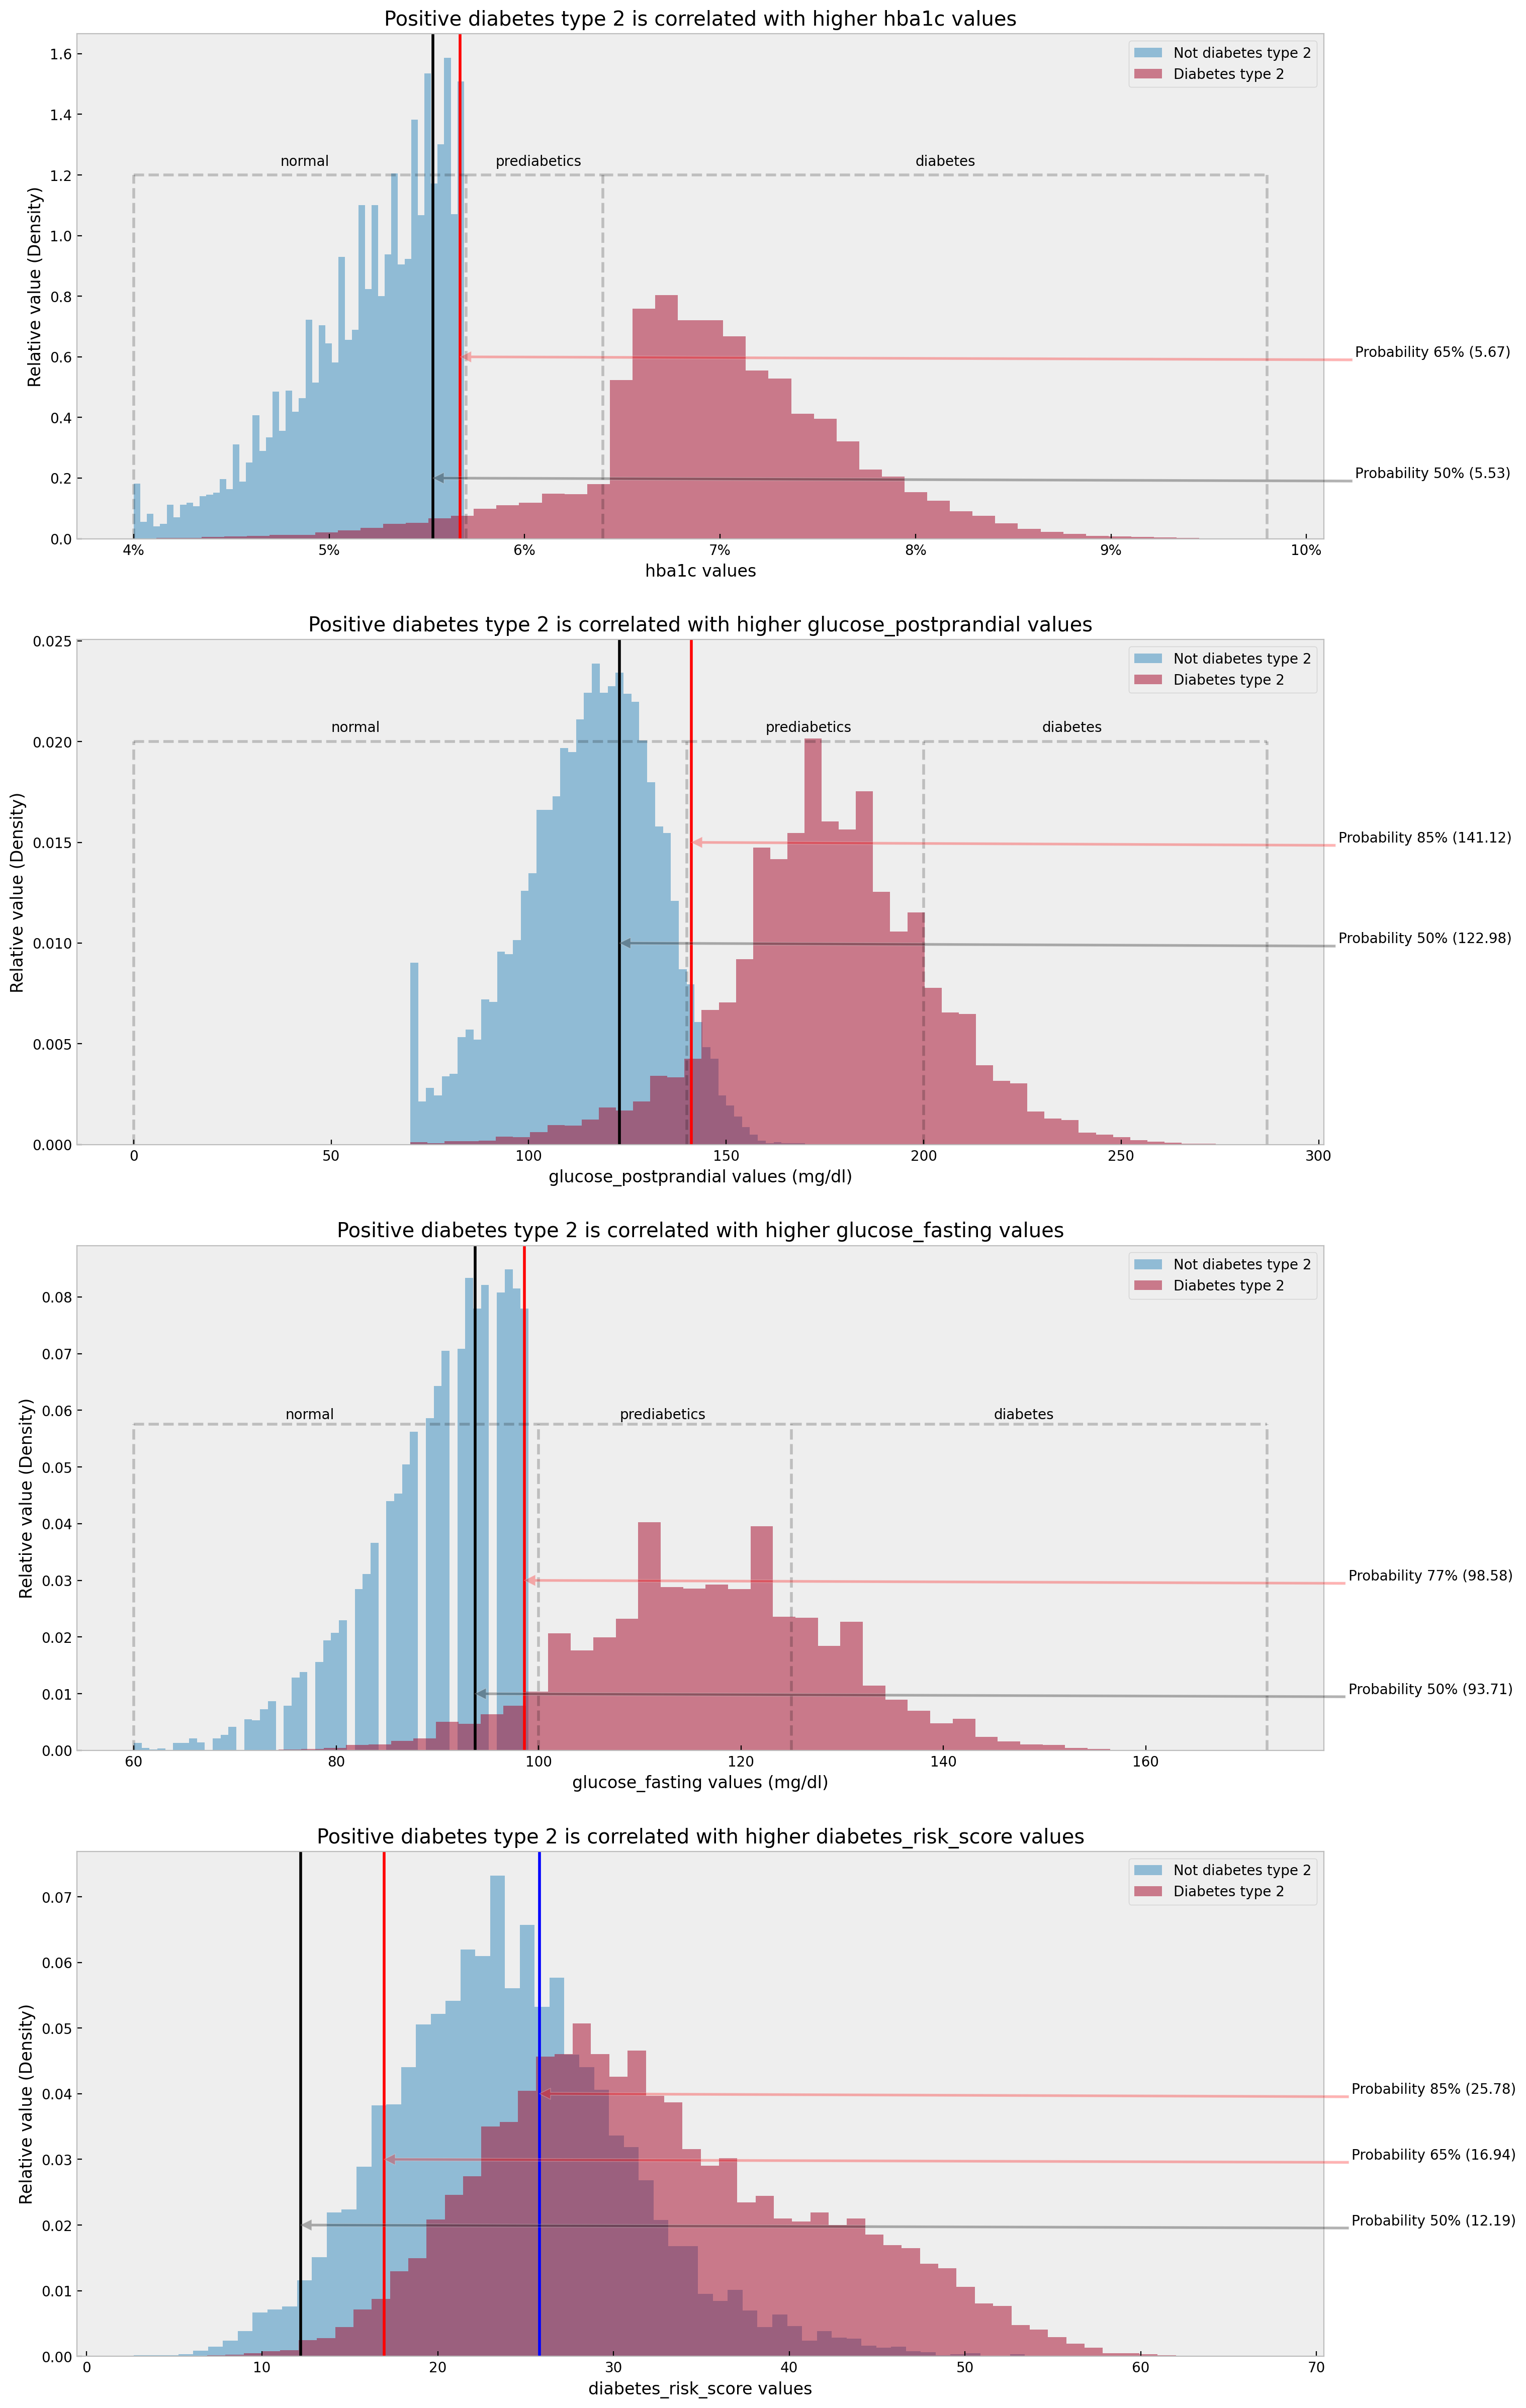

In [57]:
#Visualization by histogram for logistic regression by diabetes type 2
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 30), dpi=200)
#hba1c
df_diabetic_stage_type2_no.groupby('diabetes_stage')['hba1c'].plot(kind='hist', ax=ax[0], legend=True, alpha=0.5, density=True, bins=50);
ax[0].set_title('Positive diabetes type 2 is correlated with higher hba1c values');
ax[0].set_xlabel('hba1c values');
ax[0].set_ylabel('Relative value (Density)')
ax[0].legend(['Not diabetes type 2', 'Diabetes type 2'])
ax[0].axvline(5.53, color='black');
ax[0].axvline(5.67, color='red');
ax[0].grid(False);
ax[0].set_xticklabels(['{}%'.format(int(x)) for x in ax[0].get_xticks()])
ax[0].hlines(y=1.2, xmax=6.4, xmin=5.7, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=5.7, ymax=1.2, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=6.4, ymax=1.2, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].hlines(y=1.2, xmax=9.8, xmin=6.4, color='black', linestyle='--', alpha=0.2)
ax[0].hlines(y=1.2, xmax=5.7, xmin=4, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=4, ymax=1.2, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].vlines(x=9.8, ymax=1.2, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[0].text(5.85, 1.23, s='prediabetics')
ax[0].text(8, 1.23, s='diabetes')
ax[0].text(4.75, 1.23, s='normal')
ax[0].annotate(text='Probability 50% (5.53)',
          xy=(5.53, 0.2),
          xytext=(10.25, 0.2),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[0].annotate(text='Probability 65% (5.67)',
          xy=(5.67, 0.6),
          xytext=(10.25, 0.6),
          arrowprops=dict(facecolor='red', alpha=0.3, width=2, headwidth=8, headlength=8));

#glucose_postprandial
df_diabetic_stage_type2_no.groupby('diabetes_stage')['glucose_postprandial'].plot(kind='hist', ax=ax[1], bins=50, legend=True, alpha=0.5, density=True);
ax[1].set_title('Positive diabetes type 2 is correlated with higher glucose_postprandial values');
ax[1].set_xlabel('glucose_postprandial values (mg/dl)');
ax[1].set_ylabel('Relative value (Density)')
ax[1].legend(['Not diabetes type 2', 'Diabetes type 2'])
ax[1].axvline(122.98, color='black');
ax[1].axvline(141.12, color='red');
ax[1].grid(False);
ax[1].hlines(y=0.020, xmax=200, xmin=140, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=140, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=200, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].hlines(y=0.020, xmax=df_diabetic_stage_type2_no['glucose_postprandial'].max(), xmin=200, color='black', linestyle='--', alpha=0.2)
ax[1].hlines(y=0.020, xmax=140, xmin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=0, ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].vlines(x=df_diabetic_stage_type2_no['glucose_postprandial'].max(), ymax=0.020, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[1].text(160, 0.0205, s='prediabetics')
ax[1].text(230, 0.0205, s='diabetes')
ax[1].text(50, 0.0205, s='normal')
ax[1].annotate(text='Probability 50% (122.98)',
          xy=(122.98, 0.010),
          xytext=(305, 0.010),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[1].annotate(text='Probability 85% (141.12)',
          xy=(141.12, 0.015),
          xytext=(305, 0.015),
          arrowprops=dict(facecolor='red', alpha=0.3, width=2, headwidth=8, headlength=8));

#glucose_fasting
df_diabetic_stage_type2_no.groupby('diabetes_stage')['glucose_fasting'].plot(kind='hist', ax=ax[2], bins=50, legend=True, alpha=0.5, density=True);
ax[2].set_title('Positive diabetes type 2 is correlated with higher glucose_fasting values');
ax[2].set_xlabel('glucose_fasting values (mg/dl)');
ax[2].set_ylabel('Relative value (Density)')
ax[2].legend(['Not diabetes type 2', 'Diabetes type 2'])
ax[2].axvline(93.71, color='black');
ax[2].axvline(98.58, color='red');
ax[2].grid(False);
ax[2].hlines(y=0.0575, xmax=125, xmin=100, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=100, ymax=0.0575, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=125, ymax=0.0575, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].hlines(y=0.0575, xmax=df['glucose_fasting'].max(), xmin=125, color='black', linestyle='--', alpha=0.2)
ax[2].hlines(y=0.0575, xmax=100, xmin=df['glucose_fasting'].min(), color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=df['glucose_fasting'].min(), ymax=0.0575, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].vlines(x=df['glucose_fasting'].max(), ymax=0.0575, ymin=0, color='black', linestyle='--', alpha=0.2)
ax[2].text(108, 0.0585, s='prediabetics')
ax[2].text(145, 0.0585, s='diabetes')
ax[2].text(75, 0.0585, s='normal')
ax[2].annotate(text='Probability 50% (93.71)',
          xy=(93.71, 0.010),
          xytext=(180, 0.010),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[2].annotate(text='Probability 77% (98.58)',
          xy=(98.58, 0.03),
          xytext=(180, 0.03),
          arrowprops=dict(facecolor='red', alpha=0.3, width=2, headwidth=8, headlength=8));

#diabetes_risk_score
df_diabetic_stage_type2_no.groupby('diabetes_stage')['diabetes_risk_score'].plot(kind='hist', ax=ax[3], bins=60, legend=True, alpha=0.5, density=True);
ax[3].set_title('Positive diabetes type 2 is correlated with higher diabetes_risk_score values');
ax[3].set_xlabel('diabetes_risk_score values');
ax[3].set_ylabel('Relative value (Density)')
ax[3].legend(['Not diabetes type 2', 'Diabetes type 2'])
ax[3].axvline(12.19, color='black');
ax[3].axvline(16.94, color='red');
ax[3].axvline(25.78, color='blue');
ax[3].grid(False);

ax[3].annotate(text='Probability 50% (12.19)',
          xy=(12.19, 0.02),
          xytext=(72, 0.02),
          arrowprops=dict(facecolor='black', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[3].annotate(text='Probability 65% (16.94)',
          xy=(16.94, 0.03),
          xytext=(72, 0.03),
          arrowprops=dict(facecolor='red', alpha=0.3, width=2, headwidth=8, headlength=8));

ax[3].annotate(text='Probability 85% (25.78)',
          xy=(25.78, 0.04),
          xytext=(72, 0.04),
          arrowprops=dict(facecolor='red', alpha=0.3, width=2, headwidth=8, headlength=8));


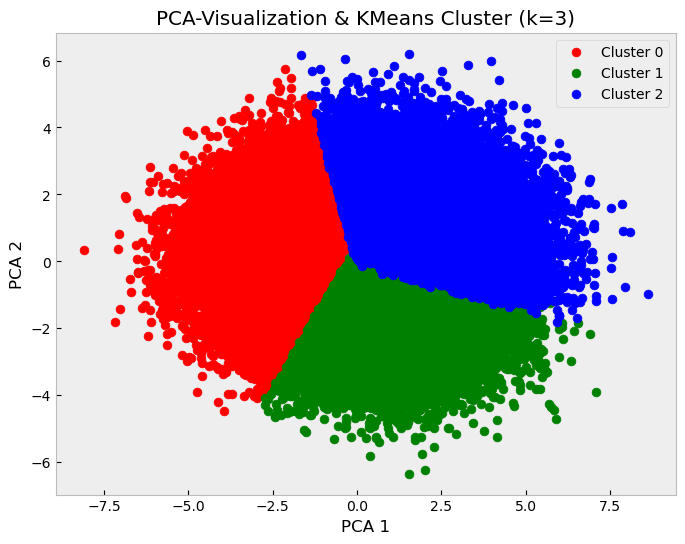

In [58]:
#clustering visualization k=3
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
category_columns = df.select_dtypes(include=['category']).columns.tolist()
label_cols = ['diabetes_stage', 'diagnosed_diabetes']
numeric_columns_without_label = [c for c in numeric_columns if c not in label_cols]
category_columns_without_label = [c for c in category_columns if c not in label_cols]
#Preprocessing: One-Hot + Scaling
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), category_columns_without_label),
    ("scale", StandardScaler(), numeric_columns_without_label)
])
X = ct.fit_transform(df)
#PCA für better clustering
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
#KMeans Clustering (k = 3)
k = 3
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(X_pca)
df["cluster"] = clusters
#PCA on 2D for visualization
pca2 = PCA(n_components=2)
coords = pca2.fit_transform(X_pca)
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(figsize=(8, 6))
for cluster_id, color in enumerate(colors):
    ax.scatter(
        coords[df["cluster"] == cluster_id, 0], 
        coords[df["cluster"] == cluster_id, 1],
        s=40,
        color=color,
        label=f"Cluster {cluster_id}")

ax.set_title("PCA-Visualization & KMeans Cluster (k=3)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.legend();
ax.grid(False);

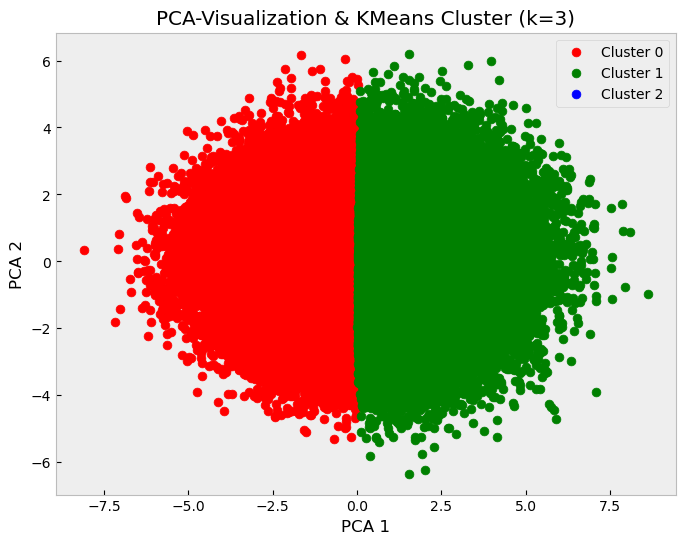

In [59]:
#clustering visualization
label_cols = ['diabetes_stage', 'diagnosed_diabetes']
numeric_columns_without_label = [c for c in numeric_columns if c not in label_cols]
category_columns_without_label = [c for c in category_columns if c not in label_cols]
#Preprocessing: One-Hot + Scaling
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), category_columns_without_label),
    ("scale", StandardScaler(), numeric_columns_without_label)
])
X = ct.fit_transform(df)
#PCA für better clustering
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
#KMeans Clustering (k = 3)
k = 2
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(X_pca)
df["cluster"] = clusters
#PCA on 2D for visualization
pca2 = PCA(n_components=2)
coords = pca2.fit_transform(X_pca)
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(figsize=(8, 6))
for cluster_id, color in enumerate(colors):
    ax.scatter(
        coords[df["cluster"] == cluster_id, 0], 
        coords[df["cluster"] == cluster_id, 1],
        s=40,
        color=color,
        label=f"Cluster {cluster_id}")

ax.set_title("PCA-Visualization & KMeans Cluster (k=3)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.legend();
ax.grid(False);

In [60]:
#clustering Datafram
summary = df.groupby("cluster").mean(numeric_only=True)
summary = summary[['diagnosed_diabetes'] + [c for c in summary.columns if c != 'diagnosed_diabetes']]
print("Cluster Datafran (numerische mean):")
display(summary)

Cluster Datafran (numerische mean):


diagnosed_diabetes    age  alcohol_consumption_per_week  \
cluster                                                            
0                      0.41  43.88                          1.99   
1                      0.80  56.88                          2.02   

         physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
cluster                                                                        
0                                    132.66        6.25                  7.0   
1                                    104.03        5.72                  7.0   

         screen_time_hours_per_day  family_history_diabetes  \
cluster                                                       
0                             5.93                     0.10   
1                             6.07                     0.35   

         hypertension_history  cardiovascular_history  ...  heart_rate  \
cluster                                                ...               
0                        0.21                    0.06  ...       69.19   
1                        0.30                    0.10  ...       70.12   

         cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
cluster                                                                       
0                    174.6            56.13            90.00         110.67   
1                    198.3            51.78           117.08         133.15   

         glucose_fasting  glucose_postprandial  insulin_level  hba1c  \
cluster                                                                
0                  104.3                146.55           7.85   6.13   
1                  118.5                174.64          10.37   6.94   

         diabetes_risk_score  
cluster                       
0                      24.87  
1                      36.02  

[2 rows x 24 columns]

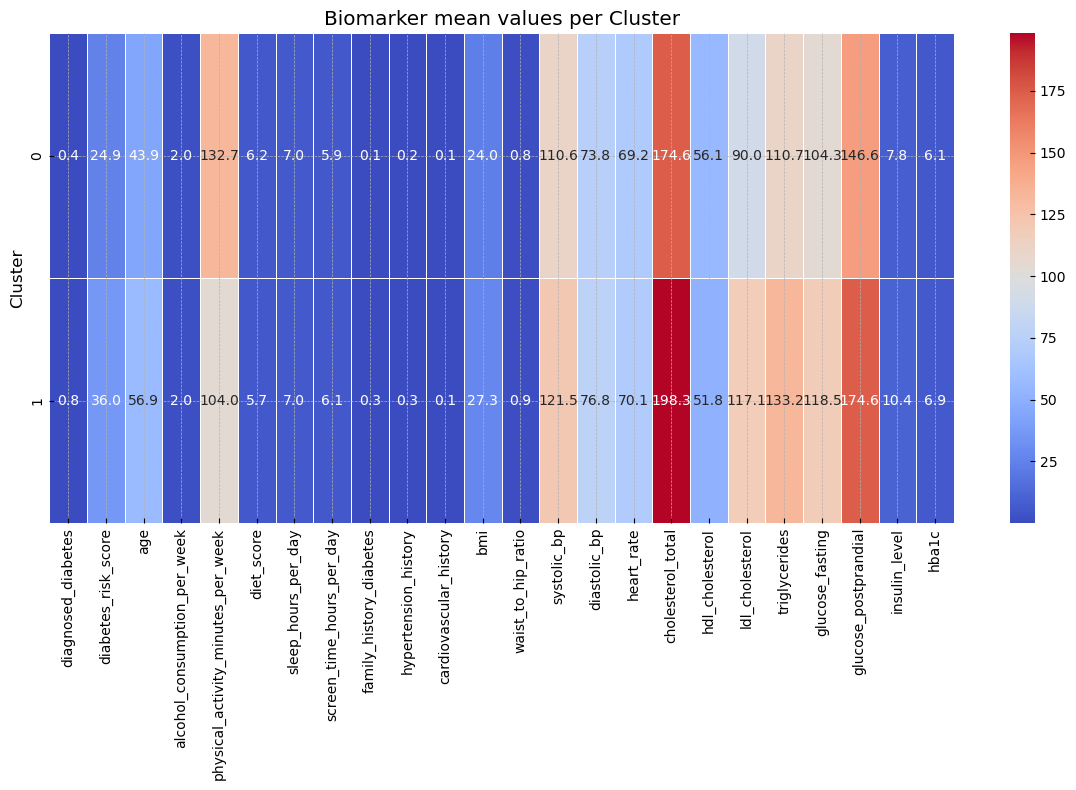

In [61]:
features = df.select_dtypes(include=['number']).columns
clustered_df = df[features].copy()

# 2. Cluster-Mittelwerte berechnen[]
cluster_means = clustered_df.groupby(df["cluster"]).mean()
features = df.select_dtypes(include=['number']).columns
clustered_df = df[features].copy()

# 2. Cluster-Mittelwerte berechnen[]
cluster_means = clustered_df.groupby(df["cluster"]).mean()
cluster_cols = ['diagnosed_diabetes'] + ['diabetes_risk_score'] + [col for col in cluster_means.columns if col not in ['diagnosed_diabetes', 'diabetes_risk_score']]
cluster_means_ordered = cluster_means[cluster_cols]

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_ordered.drop(columns=['cluster']),
            cmap="coolwarm",
            annot=True,
            fmt=".1f",
            linewidths=0.5)

plt.title("Biomarker mean values per Cluster")
plt.ylabel("Cluster")
plt.tight_layout()

In [62]:
df_numeric = df.select_dtypes(include=['number'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
pca = PCA(n_components=5)
coords = pca.fit_transform(X_scaled)

In [63]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PCA{i+1}" for i in range(pca.n_components_)],
    index=df_numeric.columns
)

# Sortment according to absolute values
loadings_abs = loadings.abs().sort_values(by="PCA1", ascending=False)

print("Top-Features for PCA1:")
print(loadings_abs.head(10))

print("\nTop-Features for PCA2:")
print(loadings_abs.sort_values(by="PCA2", ascending=False).head(10))

Top-Features for PCA1:
                      PCA1  PCA2  PCA3  PCA4      PCA5
cluster               0.39  0.07  0.01  0.03  4.77e-03
diabetes_risk_score   0.34  0.01  0.06  0.47  1.55e-01
glucose_fasting       0.32  0.27  0.01  0.03  5.96e-03
hba1c                 0.32  0.37  0.04  0.25  6.28e-02
glucose_postprandial  0.29  0.36  0.04  0.28  7.14e-02
diagnosed_diabetes    0.26  0.30  0.03  0.22  5.33e-02
bmi                   0.24  0.32  0.38  0.03  6.06e-02
age                   0.22  0.12  0.39  0.19  3.34e-01
waist_to_hip_ratio    0.20  0.30  0.38  0.03  6.79e-02
ldl_cholesterol       0.20  0.32  0.34  0.31  3.38e-01

Top-Features for PCA2:
                         PCA1  PCA2  PCA3      PCA4      PCA5
hba1c                    0.32  0.37  0.04  2.50e-01  6.28e-02
glucose_postprandial     0.29  0.36  0.04  2.76e-01  7.14e-02
bmi                      0.24  0.32  0.38  3.12e-02  6.06e-02
ldl_cholesterol          0.20  0.32  0.34  3.11e-01  3.38e-01
diagnosed_diabetes       0.26  0.30  0

Diskussion:

Hier geht es um diabetes dataset von kaggle. Dieses Dataset besteht aus 100.000 Zeilen und 32 Spalten inklusiv demographics, lifestyle, medical history und clinical meaurements. Die Zielvariablen sind diagnosed_diabetes, diabetes_stage und diabetes_risk_score.
Diabetes ist ein Überbegriff für verschiedene Erkrankungen des Stoffwechsels. Allen gemeinsam ist, dass sie zu erhöhten Blutzuckerwerten führen wegen Insulinmangel oder Insulinresistenz. Die Haupttypen von diabetes sind Typ 1, Typ 2 und den Schwangerschaftsdiabetes (Gestationsdiabetes). Der am meisten vorbereitete Diabetes Type ist Diabetes Type 2(Diabetes melitus). Diabetes Type 1 tritt bei Kinder und junge Menschen auf. Die Hauptindikatoren für die Diagnose von Diabetes sind glucose_fasting, hba1c und glucose_postprandial.
Prädiabetes ist die Vorstufe von Typ-2-Diabetes. Die Blutzuckerwerte sind bereits erhöht, allerdings noch nicht so hoch, um von einem Typ-2-Diabetes zu sprechen. Es handelt sich um eine Stoffwechselstörung, die sich über Jahre oft ohne begleitende Symptome entwickelt.

In diesem Dataset die meisten haben Diabetes Type 2 (59.8%). Nur 0.1% haben Diabetes Type 1 und 0.3% haben Gestationsdiabetes. Der Anzahl von males und females in diesem Datenset sind fast gleich. 

Dieses Dataset ist sauber. Es gibt keine fehlende Werte oder duplicates. Außerdem gibt es keinen Fehler beim Schreiben. Dieses Dataset ist bereit for Analyse.

Categoric Spalten

Diese inklusiv gender, ethnicity, education_level, income_level, employment_status und smoking_status.
Hier gibt keinen Einfluss von diesen Spalten auf Zielvariablen(diagnosed_diabetes, diabetes_stage). gender (Geschlecht) hat hier fast keinen Einfluss beim Auftretten von Diabetes.

Numerische Spalten mit Anzahl der einzigartigen Werten weniger als 20

Diese Spalten können wie categoric Spalten mit Säulendiagram(bar) visualisiert werden.
Diese inklusiv alcohol_consumption_per_week, family_history_diabetes, hypertension_history und cardiovascular_history. Bei alcohol_consumption_per_week habe ich gefunden dass beim hoheren Alkoholkonsum gibt es keine ausreichende Data zur Bewertung und Interpretation. Deshalb kann ich die Wirkung von alkohol auf dem Auftreten von Diabetes beim hoheren Konsum von alkohol nicht interpretieren. Beim niedrigen Konsum von Alkohol pro Woche ist die Wirkung von Alkohol auf dem Auftreten von Diabetes ausgeschlossen. Wissenschaftlich soll der hohe Konsum von Alkohol zum höheren Auftritt von Diabetes führen. Aber können wir das hier nicht bestätigen. 
Family_history_diabetes hat hier einen großen positiven Einfluss beim Auftreten von Diabetes, besonders beim Diabetes Type 2. Es gibt hier einen Sprung beim Auftreten von Diabetes Type 2 von 54,65% bei negativen Familiengeschichten von Diabetes zu 78% bei positiven Familiengeschichten im Vergleich zu den anderen Kategorian bei diabetes_stage Spalte. Ich sehe auch diesen Sprung beim positiven diagnosed_diabetes von 54,9% bei den negativen Familiengeschichten von Diabetes zu 78,3% bei positiven Familiengeschichten. Ich gehe davon aus, dass die genetische Überlagerung einen großen Einfluss auf dem Auftreten von Diabetes hat, besonders bei Diabetes Type 2.
hypertension_history und cardiovascular_history haben nur einen geringeren Einfluss auf dem Auftreten von Diabetes.

Numerische Spalten mit Anzahl der einzigartigen Werten mehr als 20

Diese Spalten können mit Histogram oder Boxplot visualisiert werden. Diese Spalten inklusiv age, physical_activity_minutes_per_week, sleep_hours_per_day, screen_time_hours_per_day, bmi, waist_to_hip_ratio, systolic_bp, diastolic_bp, heart_rate, cholesterol_total, hdl_cholesterol, ldl_cholesterol, triglycerides, 
glucose_fasting, hba1c, glucose_postprandial, Diabetes_risk_score und insulin_level.
Bei der Gruppierung von diabetes_stage kategorien mit Alter kann ich bemerken dass Menschen mit diabetes Type 2 die älteste und Menschen mit Typ-1-Diabetes die jüngste Gruppe in diesem Datensatz sind. Das Mittlewertalter bei positive diagnosed_diabetes bleibt größer als das bei negative diagnosed_diabetes in allen Geschlechtergruppen. glucose_fasting, hba1c, glucose_postprandial und Diabetes_risk_score sind wichtige Faktoren beim Auftreten und diagnose von Diabetes.

Lineare Regression

Variablen(age, glucose_fasting) zeigen eine sehr gute positive lineare Beziehung mit diabetes_risk_score. Auf der anderen Seite zeigt die Variable(physical_activity_minutes_per_week) eine negative lineare Beziehung mit diabetes_risk_score. je mehr Physikalische Activitäten desto weniger diabetes_risk_score und als Folge weniger Auftritt von Diabetes.
Außerdem zeigen die Variablen(waist_to_hip_ratio, triglycerides, insulin_level) eine positive gute lineare Beziehung zum bmi. Hohe Werte von triglycerides und zunehmende insulin level könnten mit Gewichtszunahme begleitet sein.
Darüber hinaus zeigt die Variable(systolic_bp) eine positive gute lineare Beziehung zum Alter. In anderen Wörtern tritt der systolische Bluthochdruck bei älteren Menschen häufiger auf als bei jüngere Menschen. 

Logistische Regression

Die Variable „diagnosed_diabetes“ ist eine binäre Spalte und eignet sich für die logistische Regression. Ich habe festgestellt, dass die Variablen (glucose_fasting, hba1c, glucose_postprandial, diabetes_risk_score) verwendet werden können, um sehr gute Modelle für die logistische Regression mit die Zielvariable(diagnosed_diabetes) zu erstellen (hohe Pseudo-R-Quadrat-Werte).
Für hba1c entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 6,29 %. Eine Wahrscheinlichkeit von 65 % entspricht einem Wert von 6,46 %. Ab diesem Wert dominiert fast ausschließlich positiv diagnosed_diabetes, und wir sehen kaum Menschen ohne Diabetes.
Für glucose_postprandial entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 150,56 mg/dl. Eine Wahrscheinlichkeit von 62 % entspricht einem Wert von 157,09 mg/dl. Ab diesem Wert dominiert fast ausschließlich positiv diagnosed_diabetes, und wir sehen kaum Menschen ohne Diabetes.
Für glucose_fasting entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 106,07 mg/dl. Dieser Wert liegt im Bereich Prädiabetes(Risikogruppe) laut Leitlinien der ADA/WHO.
Für diabetes_risk_score entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 23,84. Ab einem Wert von 20 gilt das Diabetesrisiko als sehr hoch.

Ich habe dazu auf Diabetes Type 2 focusiert. Bei diabetes_stage Spalte habe ich einen neuen Datafram gemacht die nur Diabetes Type 2 und No_Diabetes enthält. Danach habe ich Type 2 durch 1 und No_Diabetes durch 0 ersetzt. Ich bekomme am Ende diabetes_stage als binäre Spalte. Diese neue Spalte eignet sich für die logistische Regression. Ich habe festgestellt, dass die Variablen (glucose_fasting, hba1c, glucose_postprandial, diabetes_risk_score) auch verwendet werden können, um sehr gute Modelle für die logistische Regression mit die Zielvariable(diabetes_stage) zu erstellen (hohe Pseudo-R-Quadrat-Werte).
Ich habe gefunden, dass die linearen Beziehungen mit diesen Variablen im Vergleich zu diagnosed_diabetes relativ viel besser sind.
Für hba1c entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 5,53 %. Eine Wahrscheinlichkeit von 65 % entspricht einem Wert von 5,67 %. Diese zwei Werte liegen im normalen Bereich laut Leitlinien der ADA/WHO. Histogram zeigt einige Diabetes Type 2 Fällen in diesem Bereich. Der Prödiabeticsbereich beginnt ab dem Wert 5,7%. wir können das interpretieren dass diese Patienten schon als Diabetiker Type 2 festgestellt wurden und jetzt eine Behandlung bekommen um glucose im Blut zu senken.
Für glucose_postprandial entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 122,98 mg/dl. Eine Wahrscheinlichkeit von 85 % entspricht einem Wert von 141,12 mg/dl. Ab diesem Wert beherrscht Diabetes Type 2. Aber dieser Wert liegt in Prädiabeticsbereich laut Leitlinien der ADA/WHO. Wir können das auch interpretieren dass diese Patienten schon als Diabetiker Type 2 festgestellt wurden und jetzt eine Behandlung bekommen um glucose im Blut zu senken.
Für glucose_fasting entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 93,71 mg/dl. Eine Wahrscheinlichkeit von 77 % entspricht einem Wert von 98,58 mg/dl. Diese zwei Werte liegen im normalen Bereich laut Leitlinien der ADA/WHO. Der Prödiabeticsbereich beginnt ab dem Wert 100 mg/dl. Wir können das interpretieren dass diese Patienten schon als Diabetiker Type 2 festgestellt wurden und jetzt eine Behandlung bekommen um glucose im Blut zu senken.
Für diabetes_risk_score entspricht eine Wahrscheinlichkeit von 50 % einem Wert von 12,19. Eine Wahrscheinlichkeit von 65 % entspricht einem Wert von 16,94. Eine Wahrscheinlichkeit von 85 % entspricht einem Wert von 25,78. Ab diesem Wert beherrscht Diabetes Type(2) und hat eine spitze wie gezeigt bei histogram. Wie gehen davon aus dass die Leute ab diesem Wert bekommen mit sehr hoher Warscheinlichkeit diabetes Type(2) nach ein paar Jahren.

In diesem neuen Dataset identifiziert die logistische Regression Diabetes Typ 2 auch bei HbA1c-, Nüchtern- und postprandialen Glukosewerten im normoglykämischen Bereich laut Leitlinien der ADA/WHO. Dies deutet darauf hin, dass ein relevanter Anteil der Typ-2-Diabetiker in der Stichprobe pharmakologisch oder durch Lebensstilinterventionen behandelt wird, sodass aktuelle Biomarkerwerte nicht mehr die ursprüngliche metabolische Dysfunktion widerspiegeln.

Clustering mit K-Means und Visualisierung durch PCA:

Ich möchte Untergruppen von Personen mit ähnlichen Stoffwechselprofilen identifizieren. Zumerst sollte ich eine One-Hot-Kodierung für kategoriale Spalten und eine Standardskalierung für numerische Spalten (mit Ausnahme der Zielvariablen) durchführen. Anschließend habe ich vor dem Clustering eine PCA verwendet, um interpretierbare Achsen zu generieren. Ich habe hier 5 PCA-Komponenten beibehalten. Ich habe K-Means mit k=3 zumerst verwendet, um 3 Gruppen zu finden. Am Ende habe ich die X-Achse mit PCA1 und die Y-Achse mit PCA2 festgelegt. Hier wurden nur PCA1 und PCA2 ausgewählt, da PCA1 die größte Varianz in den Daten erklärt und PCA2 die zweitgrößte Varianz.
Ich sehe drei klar voneinander getrennte Cluster in der Grafik. Jede Achse enthält alle medizinischen Variablen, jedoch unterschiedlich gewichtet. Für mich ist die X-Achse wichtig, die PCA 1 darstellt. 
Die wichtigsten Merkmale für PCA1 sind die Indikatoren für Diabetes(diabetes_risk_score, hba1c, glucose_fasting, glucose_postprandial, diagnosed_diabetes, family_history_diabetes). In anderen Worten ist PCA1 der Schweregrad von Diabetes.
Ich habe auch versucht mit k=2 zwei Cluster zu erstellen. Ich finde dass zwei Cluster besser bleiben für die genaue Bestimmung der Grenze bei PCA1.
Cluster 0 zeigt niedrigere PCA1 Werte und ist die metabolische Referenzgruppe. Er repräsentiert relative gesunde Personen in diesem Dataset. Cluster 1 zeigt hohe PCA1 Werte und ist der metabolisch belastete Diabetes-Cluster.